### Aprendizaje no supervisado: Clustering

**Mini-Capstone**

El presente notebook puede servir como un ejemplo de Mini-Capstone para estudios que impliquen el uso de técnicas de agrupamiento.

**Índice**
  - [Problema: Contexto Empresarial](#contexto)
  - [Objetivos del estudio](#objetivos)
  - [Analisis exploratorio](#eda)
  - Modelado (clustering)
    - [KMeans](#kmeans)
    - [KModes](#kmodes)
      - [PCA](#pca)
    - [GMM](#gmm)
    - [DBSCAN](#dbscan)
    - [Jerárquico](#jerarquico)
  - [Resultados y comparación de modelos](#resultados)
  - [Implicaciones empresariales](#implicaciones)
  - [Conclusiones y recomendaciones](#conclusiones)
  - [Anexo](#anexo): PCA y Random Forest para selección de caraceterísticas.


Se listan los componentes del Mini-Capstone a lo largo del notebook con el siguiente encabezado.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

**Aprendizaje Supervisado:**

En el aprendizaje supervisado, los algoritmos se entrenan utilizando un conjunto de datos que incluye **entradas** junto con **las respuestas o etiquetas correspondientes**. El objetivo principal es aprender una relación entre las entradas y las salidas conocidas para poder realizar predicciones precisas sobre nuevos datos no etiquetados. Durante el entrenamiento, el algoritmo ajusta sus parámetros para minimizar la diferencia entre las predicciones y las respuestas reales, lo que permite generalizar patrones y relaciones en los datos. Este enfoque se utiliza ampliamente en tareas como clasificación y regresión, donde se busca automatizar la asignación de etiquetas o valores a nuevas instancias basándose en la información aprendida durante el proceso de entrenamiento.

El análisis de **clustering es un método de aprendizaje no supervisado** que separa los puntos de datos en varios grupos o conjuntos específicos, de manera que los puntos de datos en el mismo grupo tienen propiedades similares y los puntos de datos en grupos diferentes tienen propiedades diferentes en algún sentido.

**Aprendizaje No Supervisado y Clustering:**

**Aprendizaje No Supervisado:**
- En el aprendizaje no supervisado, el algoritmo se enfrenta a datos sin etiquetas o respuestas previas. El objetivo es encontrar patrones, estructuras o relaciones intrínsecas en los datos sin la guía explícita de resultados conocidos.

**Clustering:**
- El clustering es una técnica común en el aprendizaje no supervisado. El objetivo es agrupar los datos en conjuntos, llamados clusters, de manera que los elementos dentro del mismo cluster sean más similares entre sí que con los elementos de otros clusters. Los puntos dentro de un cluster comparten ciertas propiedades o características comunes.

**Proceso de Clustering:**
1. **Datos sin Etiquetas:**
   - Comienza con un conjunto de datos que no tiene etiquetas o categorías predefinidas.

2. **Identificación de Patrones:**
   - El algoritmo de clustering busca patrones o estructuras en los datos basándose en alguna medida de similitud o distancia entre los puntos.

3. **Formación de Clusters:**
   - Agrupa los datos en clusters de manera que los elementos dentro de un mismo cluster sean más similares entre sí que con los elementos de otros clusters.

4. **Interpretación:**
   - Después de la formación de clusters, se analizan e interpretan los resultados. Dependiendo del contexto, los clusters pueden representar categorías, segmentos o patrones en los datos.

**Tipos de métodos de agrupamiento:**

- Agrupamiento rígido: los clústeres no se superponen (un elemento pertenece o no pertenece a un clúster), por ejemplo, K-means, K-Medoid.

- Agrupamiento suave: los clústeres pueden superponerse (fortaleza de la asociación entre clústeres e instancias), por ejemplo, modelo de mezcla (GMM) utilizando el algoritmo Expectation-Maximization.

**Tipos de Algoritmos de Clustering:**

- **K-Means:** Divide los datos en k clusters, asignando cada punto al cluster con el centroide más cercano.
  
- **Gaussian Mixture Models (GMM):** Modela los datos como una mezcla de distribuciones gaussianas, permitiendo clusters con diferentes formas y tamaños.

- **Hierarchical Clustering:** Construye una jerarquía de clusters, en la que los clusters pueden contener subclusters.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Identifica clusters basándose en la densidad de los puntos en el espacio.

**Aplicaciones:**
- El clustering se utiliza en diversas áreas, como segmentación de clientes, análisis de redes sociales, organización de documentos, reconocimiento de patrones en imágenes y más.

El aprendizaje no supervisado, especialmente el clustering, es esencial para descubrir patrones y estructuras ocultas en datos no etiquetados, lo que puede proporcionar insights valiosos y facilitar la toma de decisiones en diversas disciplinas.

### Fuentes y recursos

- https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
- https://machinelearningmastery.com/discretization-transforms-for-machine-learning/
- https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm
- https://www.kaggle.com/code/vipulgandhi/kmeans-detailed-explanation/notebook
- https://www.kaggle.com/code/meetnagadia/dbscan-clustering
- https://www.kaggle.com/code/vipulgandhi/gaussian-mixture-models-clustering-explained
- https://mrinalyadav7.medium.com/dbscan-algorithm-c894701306d5

**Requisitos**

```Python
!pip install kmodes
!pip install pca
```

- Vamos a aplicar todas estas técnicas en el problema empresarial que se detalla a continuación. 

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

<a name="contexto"></a>
### Estudio de Usabilidad de un Sistema de Telerehabilitación con Kinect

**Contexto empresarial**

La empresa RehabTech Inc. se especializa en el desarrollo de soluciones tecnológicas innovadoras para el sector de la salud y el bienestar. Recientemente, han lanzado al mercado un Sistema de Telerehabilitación con Kinect, diseñado para permitir a los pacientes realizar ejercicios de rehabilitación desde la comodidad de sus hogares con la ayuda de la tecnología de Kinect de Microsoft. Sin embargo, tras el lanzamiento del sistema, la empresa ha recibido comentarios variados sobre la usabilidad de la plataforma.

Algunos usuarios encuentran el sistema fácil de usar y beneficioso para su recuperación, mientras que otros experimentan dificultades al navegar por la interfaz y realizar los ejercicios correctamente. Ante esta situación, RehabTech Inc. reconoce la importancia de abordar los problemas de usabilidad para garantizar una experiencia positiva para todos los usuarios y maximizar el impacto del Sistema de Telerehabilitación con Kinect en el mercado.

Con el objetivo de comprender mejor las necesidades y preferencias de los usuarios, así como identificar áreas de mejora en el diseño y la funcionalidad del sistema, la empresa ha decidido llevar a cabo un estudio exhaustivo de usabilidad. Este estudio no solo proporcionará información valiosa para optimizar el Sistema de Telerehabilitación con Kinect, sino que también permitirá a RehabTech Inc. diferenciarse en el mercado al ofrecer una solución tecnológica superior y centrada en el usuario.

Con el objetivo de evaluar la usabilidad de este sistema, se ha llevado a cabo un estudio que recopila diversas variables relacionadas con la experiencia del usuario.

Las variables recopiladas incluyen:

- **SUS (System Usability Scale):** Una medida estandarizada de la usabilidad percibida del sistema.
- **Time (Tiempo de Realización del Ejercicio):** El tiempo que los pacientes dedican a realizar los ejercicios de rehabilitación en el sistema.
- **ID (Identificación):** Clasificación de los participantes como estudiantes o empleados.
- **Gender (Género):** Género de los participantes, clasificado como masculino (M) o femenino (F).
- **Age (Edad):** Edad de los participantes, categorizada en veinte (twenty), treinta (thirty) o cuarenta (forty) años.
- **Kinect:** Experiencia previa de los participantes utilizando la tecnología Kinect, clasificada como alta (high), media (average) o ninguna (none).
- **NUI (Natural User Interfaces):** Experiencia previa de los participantes utilizando interfaces de usuario naturales, clasificada como alta (high), media (average) o ninguna (none).
- **Games (Juegos):** Experiencia previa de los participantes utilizando juegos, clasificada como alta (high), media (average) o ninguna (none).

El objetivo principal del estudio es evaluar la usabilidad del sistema de telerehabilitación y entender cómo factores como la experiencia previa con la tecnología Kinect, las interfaces de usuario naturales y los juegos pueden influir en la experiencia del usuario. Los resultados de este estudio proporcionarán información valiosa para mejorar el diseño y la funcionalidad del sistema, con el fin de ofrecer una experiencia de telerehabilitación más efectiva y satisfactoria para los pacientes.

Para evaluar la usabilidad del sistema de telerehabilitación, este estudio tiene como objetivo explorar patrones de comportamiento y preferencias entre los usuarios. Para ello, se aplicarán técnicas de clustering para identificar grupos de usuarios con características y necesidades similares. El análisis de clustering permitirá segmentar a los usuarios en grupos homogéneos con respecto a variables como la experiencia previa con la tecnología, la edad y el género, entre otros.

A través del clustering, se buscará identificar perfiles de usuarios que puedan tener necesidades y expectativas similares con respecto al sistema de telerehabilitación. Esto proporcionará información valiosa para personalizar la experiencia del usuario y adaptar el sistema a las distintas necesidades y preferencias de cada grupo. Los hallazgos del clustering servirán como base para el diseño de estrategias de mejora y la implementación de funcionalidades específicas que puedan satisfacer las necesidades individuales y colectivas de los usuarios del sistema de telerehabilitación.

<a name="objetivos"></a>

**Los objetivos específicos del Estudio de Usabilidad de un Sistema de Telerehabilitación con Kinect son:**

1. Evaluar la usabilidad percibida del sistema de telerehabilitación entre los usuarios, utilizando métricas como la System Usability Scale (SUS) y el tiempo de realización de ejercicios.
2. Identificar posibles problemas de usabilidad o áreas de mejora en el diseño y la funcionalidad del sistema.
3. Analizar cómo factores demográficos como la edad, el género y la experiencia previa con tecnologías como Kinect afectan la usabilidad percibida del sistema.
4. Comparar diferentes técnicas de clustering para segmentar a los usuarios en grupos homogéneos con respecto a su experiencia de uso y percepción de la usabilidad del sistema.
5. Visualizar y comprender la estructura de los clústeres generados por cada técnica de clustering para identificar patrones de comportamiento y características distintivas de cada grupo de usuarios.
6. Comparar el desempeño de diferentes algoritmos de clustering, como KMeans, KModes, GMM, clustering basado en densidad y clustering jerárquico, en términos de su capacidad para identificar grupos significativos de usuarios en función de la usabilidad percibida y otros factores relevantes.
7. Integrar técnicas de análisis multivariado, como PCA, para comprender la estructura subyacente de los datos y su relación con la usabilidad del sistema.
8. Proporcionar recomendaciones específicas para mejorar la usabilidad del sistema con base en los hallazgos del estudio.

<a name="eda"></a>
### Análisis exploratorio de datos

Realizaremos un análisis exploratorio basado en una tabla descriptiva que muestra las estadísticas resumidas de las variables numéricas (`Tiempo`, `SUS`) agrupadas por variables categóricas (`Gender`, `Age`). Esta tabla nos proporcionará información valiosa sobre la distribución y tendencias de las variables de interés en diferentes subgrupos de nuestra muestra. Nos permitirá identificar posibles patrones o diferencias en el tiempo y la usabilidad del sistema entre diferentes grupos demográficos, como género y edad, lo que nos ayudará a comprender mejor el comportamiento de los usuarios en relación con el sistema de telemedicina.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/UX_data.csv")

data.groupby(["Gender", "Age"]).describe()

SUS                                                          \
              count       mean        std   min     25%    50%    75%   max   
Gender Age                                                                    
F      forty    4.0  70.625000  15.189772  52.5  61.875  71.25  80.00  87.5   
       thirty   3.0  79.166667  10.103630  70.0  73.750  77.50  83.75  90.0   
       twenty   3.0  73.333333  28.975564  40.0  63.750  87.50  90.00  92.5   
M      forty    2.0  75.000000  17.677670  62.5  68.750  75.00  81.25  87.5   
       thirty   4.0  71.250000  14.505746  57.5  61.250  68.75  78.75  90.0   
       twenty  14.0  79.107143  13.250803  42.5  75.625  80.00  87.50  95.0   

               Time                                                         \
              count        mean        std    min      25%     50%     75%   
Gender Age                                                                   
F      forty    4.0  178.675000   6.905734  171.0  173.775  179.35  184.25   
       thirty   3.0  168.766667  21.990074  144.0  160.150  176.30  181.15   
       twenty   3.0  166.966667  20.132892  148.3  156.300  164.30  176.30   
M      forty    2.0  175.300000   2.828427  173.3  174.300  175.30  176.30   
       thirty   4.0  164.300000  25.390287  128.3  156.050  171.80  180.05   
       twenty  14.0  142.521429  18.154431  112.7  135.400  143.35  152.30   

                      
                 max  
Gender Age            
F      forty   185.0  
       thirty  186.0  
       twenty  188.3  
M      forty   177.3  
       thirty  185.3  
       twenty  179.3

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Al analizar los datos presentados en la tabla, se destaca que el grupo de edad cuarenta y género femenino muestra una evaluación menos favorable de la usabilidad del sistema, con una puntuación promedio en la escala `SUS` de 70.625. En contraste, los participantes masculinos en el grupo de edad veinte son quienes reportan una percepción más positiva de la usabilidad, con una calificación media de 79.11 en la misma escala.

Asimismo, se observa que las mujeres en el grupo de mayor edad tienden a experimentar mayores dificultades en el uso del sistema, como lo indica el tiempo promedio más prolongado para completar el ejercicio, con un registro de 178.675 segundos. Por otro lado, los hombres jóvenes en el grupo de veinte años presentan el tiempo de uso promedio más bajo con 142.52 segundos.

Estos hallazgos sugieren que tanto la edad como el género ejercen una influencia significativa en la percepción y el uso del sistema de telerehabilitación.

**Diagrama catplot**

Este patrón se ilustra claramente en el gráfico catplot siguiente, donde la variable `Time` se representa en el eje x y `Gender` en el eje y. Además, la variable `Age` se utiliza como parámetro `hue` y los datos se dividen en columnas según la variable `ID`. 

Se observa que todos los estudiantes se agrupan en la primera columna, principalmente en el grupo de edad de 20 años. En contraste, en el grupo de empleados, se encuentran representados todos los grupos de edad, aunque el grupo de veinte años es minoritario. 

Una observación relevante es que el tiempo promedio empleado para completar el ejercicio es mayor en el grupo de empleados en comparación con el grupo de estudiantes.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


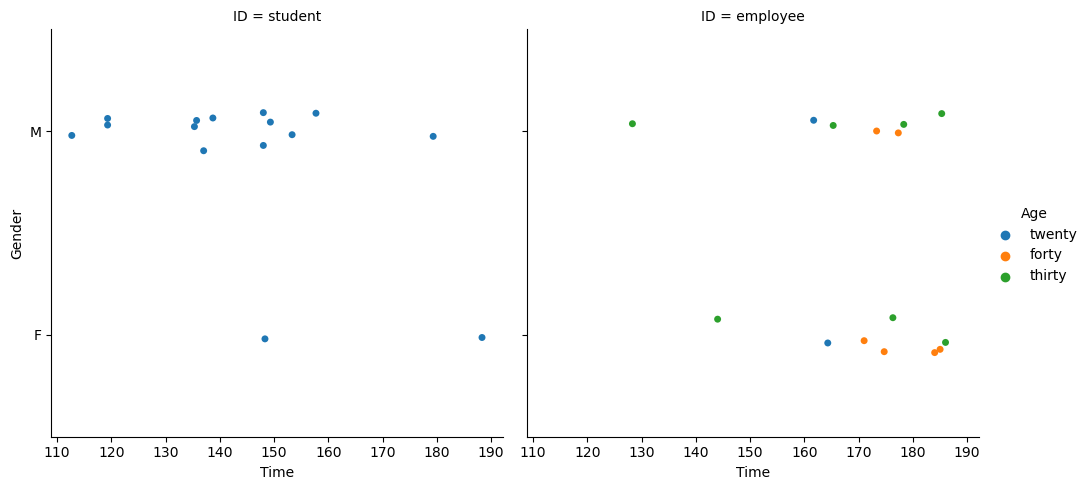

In [2]:
sns.catplot(data=data, x="Time", y="Gender", col="ID", hue="Age", kind="strip");
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

El gráfico de densidad bivariado revela distintas relaciones entre las variables `SUS` y `Time` para cada grupo de edad. Para el grupo **twenty**, se observa una relación negativa, donde a medida que disminuye el tiempo (eje y), aumenta el puntaje `SUS` (eje x). Esto sugiere que los jóvenes que completan el ejercicio en menos tiempo tienden a otorgar una calificación de usabilidad más alta al sistema, un resultado esperado debido a su agilidad y familiaridad con la tecnología.

Por otro lado, para el grupo de edad **thirty**, se observa una relación positiva entre las variables. A medida que aumenta el tiempo empleado en el ejercicio, también lo hace el puntaje de usabilidad, lo cual puede parecer contra intuitivo. Sin embargo, esto podría deberse a un comportamiento reflexivo de este grupo de edad, quienes podrían tomarse más tiempo para analizar el sistema con detenimiento antes de otorgar su calificación de usabilidad.

Finalmente, en el caso del grupo de edad **forty**, se observa que les toma más tiempo completar el ejercicio y no se observa una diferencia significativa en el puntaje de usabilidad otorgado por este grupo. Esto se refleja en la forma horizontal del diagrama de densidad para este grupo, indicando una distribución más uniforme de los puntajes de usabilidad.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/si

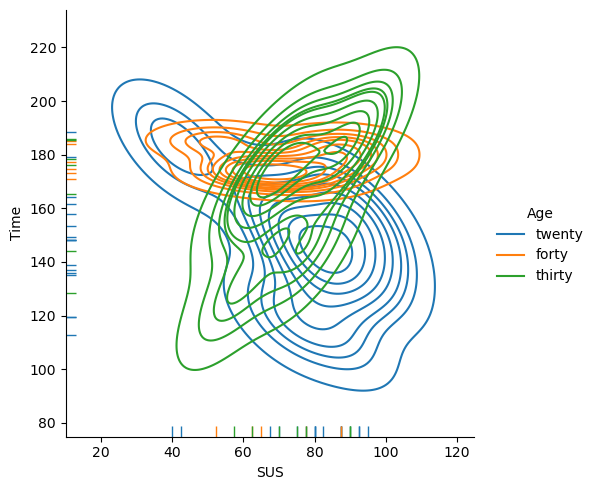

In [3]:
sns.displot(data=data, x="SUS", y="Time", hue="Age", 
                                        kind="kde", rug=True,
                                        common_norm=False)
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

El gráfico pairplot nos proporciona una visualización completa de las relaciones entre las variables SUS y Time, así como las distribuciones univariadas de cada una de estas variables. En los gráficos de dispersión, podemos comparar la relación entre `SUS` en el eje x y `Time` en el eje y, lo que nos permite observar la dispersión de los datos y cualquier patrón o tendencia entre estas dos variables. 

Además, los gráficos de densidad univariados nos muestran las distribuciones de las variables SUS y Time por separado, lo que nos permite identificar cualquier diferencia en la distribución entre los grupos de edad o género. En particular, podemos observar diferencias más pronunciadas entre los grupos para la variable Time, lo que sugiere variaciones en el tiempo empleado en el ejercicio entre los diferentes grupos. Sin embargo, las diferencias en los puntajes SUS parecen ser menos marcadas entre los grupos, lo que indica una menor variabilidad en la percepción de la usabilidad del sistema entre los grupos de edad o género.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/envs

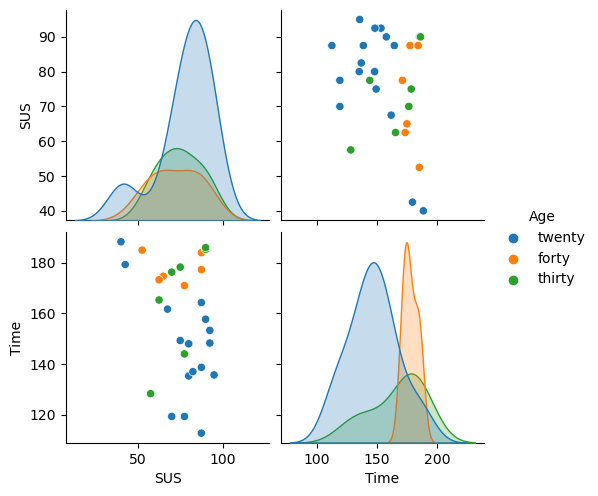

In [4]:
sns.pairplot(data, hue="Age")
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

### Modelado: Análisis de clustering

Realizaremos un análisis de clustering utilizando diversas técnicas, empezaremos por KMeans que requiere variables numéricas. Para preparar los datos de acuerdo a las técnicas que emplean datos numéricos, realizaremos la estandarización o normalización de las variables numéricas para asegurar que todas tengan la misma escala y contribuyan de manera equitativa al análisis. Esto garantizará que las diferencias en la magnitud de las variables no distorsionen los resultados del clustering. Por otro lado, para las técnicas que utilizan datos categóricos, aplicaremos codificación label encoding o técnicas similares para convertir las variables categóricas en variables numéricas.

In [5]:
data

SUS   Time        ID Gender     Age   Kinect      NUI    Games
0   42.5  179.3   student      M  twenty     high  average     high
1   92.5  153.3   student      M  twenty     high     high     high
2   95.0  135.7   student      M  twenty  average  average     high
3   92.5  148.3   student      F  twenty  average     high     high
4   80.0  148.0   student      M  twenty  average  average     high
5   87.5  138.7   student      M  twenty  average     high     high
6   75.0  149.3   student      M  twenty  average  average  average
7   80.0  135.3   student      M  twenty  average     high     high
8   80.0  148.0   student      M  twenty  average     high  average
9   65.0  174.7  employee      F   forty  average     high     none
10  40.0  188.3   student      F  twenty  average     high  average
11  67.5  161.7  employee      M  twenty  average  average  average
12  82.5  137.0   student      M  twenty  average     none     high
13  90.0  157.7   student      M  twenty  average     high  average
14  70.0  119.3   student      M  twenty  average     none     none
15  77.5  119.3   student      M  twenty  average  average  average
16  87.5  112.7   student      M  twenty  average     none  average
17  57.5  128.3  employee      M  thirty     high     none  average
18  52.5  185.0  employee      F   forty  average  average  average
19  62.5  173.3  employee      M   forty     none     none     none
20  62.5  165.3  employee      M  thirty     high     high     high
21  87.5  177.3  employee      M   forty  average     none  average
22  75.0  178.3  employee      M  thirty     none  average  average
23  87.5  164.3  employee      F  twenty  average  average  average
24  87.5  184.0  employee      F   forty     none  average     none
25  70.0  176.3  employee      F  thirty  average  average  average
26  90.0  185.3  employee      M  thirty     none     none     none
27  90.0  186.0  employee      F  thirty     none  average  average
28  77.5  171.0  employee      F   forty     none     none     none
29  77.5  144.0  employee      F  thirty     none  average  average

<a name="preproceso"></a>
### Preparación de datos

K-Means requiere variables numéricas, ya que se basa en medidas de distancia para agrupar los datos. El algoritmo utiliza la distancia euclidiana para calcular la similitud entre puntos en un espacio multidimensional. Por lo tanto, para que K-Means funcione adecuadamente, todas las variables deben ser numéricas y tener escalas comparables.

Es común aplicar técnicas de codificación para variables categóricas, como la codificación one-hot o la codificación ordinal, para convertirlas en variables numéricas antes de aplicar K-Means.

Las variables numéricas deben estar en escalas similares para evitar que el algoritmo se vea sesgado por las diferencias de magnitud entre las variables. La estandarización o normalización de las variables puede ser útil en este contexto. Esto asegura que todas las variables contribuyan de manera equitativa al proceso de agrupamiento.

La codificación de variables categóricas a numéricas es un paso esencial en el preprocesamiento de datos para muchos algoritmos de aprendizaje automático.

1. **Codificación One-Hot (Dummy Encoding):**
En esta técnica, cada categoría única de una variable categórica se convierte en una nueva columna binaria (0 o 1) y se asigna un valor de 1 a la columna correspondiente a la categoría de la observación y 0 en las demás columnas. Esto crea una representación binaria distintiva para cada categoría.

- Por ejemplo una columna `Color` que contenga tres valores únicos `{'Rojo', 'Verde', 'Azul'}`

|    | Color   |
|---:|:--------|
|  0 | Rojo    |
|  1 | Verde   |
|  2 | Azul    |
|  3 | Rojo    |
|  4 | Verde   |

- Resultaría en:

|    |   Color_Azul |   Color_Rojo |   Color_Verde |
|---:|-------------:|-------------:|--------------:|
|  0 |            0 |            1 |             0 |
|  1 |            0 |            0 |             1 |
|  2 |            1 |            0 |             0 |
|  3 |            0 |            1 |             0 |
|  4 |            0 |            0 |             1 |

2. **Codificación Ordinal:**

Si las categorías tienen un orden inherente, puedes asignarles valores numéricos de manera ordinal. Esto es adecuado cuando hay una relación ordinal real entre las categorías.

- Es posible asignar manualmente valores numéricos o utilizar la función `map` en pandas.

|    | Color   |   Color_Ordinal |
|---:|:--------|----------------:|
|  0 | Rojo    |               1 |
|  1 | Verde   |               2 |
|  2 | Azul    |               3 |
|  3 | Rojo    |               1 |
|  4 | Verde   |               2 |

- Utilizaremos codificación ordinal para nuestras variables.

In [6]:
encoded_data = data.copy()

In [7]:
gender_mapping = {v: i for i,v in enumerate(data.Gender.unique())}
gender_mapping

{'M': 0, 'F': 1}

In [8]:
encoded_data.Gender = encoded_data.Gender.map(gender_mapping)
encoded_data

SUS   Time        ID  Gender     Age   Kinect      NUI    Games
0   42.5  179.3   student       0  twenty     high  average     high
1   92.5  153.3   student       0  twenty     high     high     high
2   95.0  135.7   student       0  twenty  average  average     high
3   92.5  148.3   student       1  twenty  average     high     high
4   80.0  148.0   student       0  twenty  average  average     high
5   87.5  138.7   student       0  twenty  average     high     high
6   75.0  149.3   student       0  twenty  average  average  average
7   80.0  135.3   student       0  twenty  average     high     high
8   80.0  148.0   student       0  twenty  average     high  average
9   65.0  174.7  employee       1   forty  average     high     none
10  40.0  188.3   student       1  twenty  average     high  average
11  67.5  161.7  employee       0  twenty  average  average  average
12  82.5  137.0   student       0  twenty  average     none     high
13  90.0  157.7   student       0  twenty  average     high  average
14  70.0  119.3   student       0  twenty  average     none     none
15  77.5  119.3   student       0  twenty  average  average  average
16  87.5  112.7   student       0  twenty  average     none  average
17  57.5  128.3  employee       0  thirty     high     none  average
18  52.5  185.0  employee       1   forty  average  average  average
19  62.5  173.3  employee       0   forty     none     none     none
20  62.5  165.3  employee       0  thirty     high     high     high
21  87.5  177.3  employee       0   forty  average     none  average
22  75.0  178.3  employee       0  thirty     none  average  average
23  87.5  164.3  employee       1  twenty  average  average  average
24  87.5  184.0  employee       1   forty     none  average     none
25  70.0  176.3  employee       1  thirty  average  average  average
26  90.0  185.3  employee       0  thirty     none     none     none
27  90.0  186.0  employee       1  thirty     none  average  average
28  77.5  171.0  employee       1   forty     none     none     none
29  77.5  144.0  employee       1  thirty     none  average  average

In [9]:
age_mapping = {v: 10+10*(i+1) for i,v in enumerate(data.Age.unique())}
print(age_mapping)

encoded_data.Age = encoded_data.Age.map(age_mapping)
encoded_data

{'twenty': 20, 'forty': 30, 'thirty': 40}


SUS   Time        ID  Gender  Age   Kinect      NUI    Games
0   42.5  179.3   student       0   20     high  average     high
1   92.5  153.3   student       0   20     high     high     high
2   95.0  135.7   student       0   20  average  average     high
3   92.5  148.3   student       1   20  average     high     high
4   80.0  148.0   student       0   20  average  average     high
5   87.5  138.7   student       0   20  average     high     high
6   75.0  149.3   student       0   20  average  average  average
7   80.0  135.3   student       0   20  average     high     high
8   80.0  148.0   student       0   20  average     high  average
9   65.0  174.7  employee       1   30  average     high     none
10  40.0  188.3   student       1   20  average     high  average
11  67.5  161.7  employee       0   20  average  average  average
12  82.5  137.0   student       0   20  average     none     high
13  90.0  157.7   student       0   20  average     high  average
14  70.0  119.3   student       0   20  average     none     none
15  77.5  119.3   student       0   20  average  average  average
16  87.5  112.7   student       0   20  average     none  average
17  57.5  128.3  employee       0   40     high     none  average
18  52.5  185.0  employee       1   30  average  average  average
19  62.5  173.3  employee       0   30     none     none     none
20  62.5  165.3  employee       0   40     high     high     high
21  87.5  177.3  employee       0   30  average     none  average
22  75.0  178.3  employee       0   40     none  average  average
23  87.5  164.3  employee       1   20  average  average  average
24  87.5  184.0  employee       1   30     none  average     none
25  70.0  176.3  employee       1   40  average  average  average
26  90.0  185.3  employee       0   40     none     none     none
27  90.0  186.0  employee       1   40     none  average  average
28  77.5  171.0  employee       1   30     none     none     none
29  77.5  144.0  employee       1   40     none  average  average

También podemos usar la función `replace` para la codificación de variables categóricas. Aquí hay una explicación línea por línea del código en la celda siguiente:

1. `kinect_response = {v: 2-i for i,v in enumerate(data.Kinect.unique())}`:
   - Se está creando un diccionario llamado `kinect_response`.
   - `data.Kinect.unique()` devuelve los valores únicos en la columna 'Kinect' del DataFrame `data`.
   - `enumerate(data.Kinect.unique())` genera índices (`i`) y valores (`v`) para cada elemento único en 'Kinect'.
   - `{v: 2-i for i,v in enumerate(data.Kinect.unique())}` crea un diccionario donde las claves son los valores únicos de 'Kinect' y los valores asociados son 2 menos el índice de ese valor único.
   - Esto es parte de un proceso de codificación ordinal, depende el orden presente en el dataframe, no siempre es posible esta automatización.

2. `print(kinect_response)`:
   - Imprime el diccionario `kinect_response` para mostrar la relación entre los valores únicos de 'Kinect' y sus respectivos valores codificados.

3. `col_r = ['Kinect', 'NUI', 'Games']`:
   - Se crea una lista llamada `col_r` que contiene las columnas ('Kinect', 'NUI', 'Games') que se utilizarán para reemplazar valores en el DataFrame.

4. `[encoded_data.replace({col: kinect_response}, inplace=True) for col in col_r];`:
   - Se realiza un bucle a través de cada columna especificada en `col_r`.
   - `encoded_data.replace({col: kinect_response}, inplace=True)` reemplaza los valores en la columna `col` del DataFrame `encoded_data` utilizando el diccionario `kinect_response`.
   - El parámetro `inplace=True` modifica directamente el DataFrame `encoded_data` sin necesidad de asignar el resultado a una nueva variable.
   - El uso de corchetes `[...]` indica que se está utilizando una comprensión de lista, pero aquí no se está utilizando la lista resultante, solo se está aplicando la operación en su lugar.

En resumen, este código está creando un diccionario para codificar valores únicos de la columna 'Kinect' de un DataFrame y luego aplica esta codificación a las columnas especificadas en `col_r` en el DataFrame `encoded_data`.

In [10]:
kinect_response = {v: 2-i for i,v in enumerate(data.Kinect.unique())}
print(kinect_response)

col_r = ['Kinect', 'NUI', 'Games']  # column to replace values

[encoded_data.replace({col: kinect_response}, inplace=True) for col in col_r];

ID_response = {v: i for i,v in enumerate(data.ID.unique())}
print(ID_response)

col_r = ['ID']  # column to replace values

[encoded_data.replace({col: ID_response}, inplace=True) for col in col_r];

encoded_data

{'high': 2, 'average': 1, 'none': 0}
{'student': 0, 'employee': 1}


/tmp/ipykernel_419/1715790483.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  [encoded_data.replace({col: kinect_response}, inplace=True) for col in col_r];
/tmp/ipykernel_419/1715790483.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  [encoded_data.replace({col: ID_response}, inplace=True) for col in col_r];


SUS   Time  ID  Gender  Age  Kinect  NUI  Games
0   42.5  179.3   0       0   20       2    1      2
1   92.5  153.3   0       0   20       2    2      2
2   95.0  135.7   0       0   20       1    1      2
3   92.5  148.3   0       1   20       1    2      2
4   80.0  148.0   0       0   20       1    1      2
5   87.5  138.7   0       0   20       1    2      2
6   75.0  149.3   0       0   20       1    1      1
7   80.0  135.3   0       0   20       1    2      2
8   80.0  148.0   0       0   20       1    2      1
9   65.0  174.7   1       1   30       1    2      0
10  40.0  188.3   0       1   20       1    2      1
11  67.5  161.7   1       0   20       1    1      1
12  82.5  137.0   0       0   20       1    0      2
13  90.0  157.7   0       0   20       1    2      1
14  70.0  119.3   0       0   20       1    0      0
15  77.5  119.3   0       0   20       1    1      1
16  87.5  112.7   0       0   20       1    0      1
17  57.5  128.3   1       0   40       2    0      1
18  52.5  185.0   1       1   30       1    1      1
19  62.5  173.3   1       0   30       0    0      0
20  62.5  165.3   1       0   40       2    2      2
21  87.5  177.3   1       0   30       1    0      1
22  75.0  178.3   1       0   40       0    1      1
23  87.5  164.3   1       1   20       1    1      1
24  87.5  184.0   1       1   30       0    1      0
25  70.0  176.3   1       1   40       1    1      1
26  90.0  185.3   1       0   40       0    0      0
27  90.0  186.0   1       1   40       0    1      1
28  77.5  171.0   1       1   30       0    0      0
29  77.5  144.0   1       1   40       0    1      1

Hemos realizado un ordinal encoding

- Obtendriámos el mismo resultado del `replace` usando el `OrdinalEncoder` implementado en `sklearn.preprocessing`

- Se muestra a continuación un ejemplo para la columna `Game`:

In [11]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['none','average','high']])

print(encoder.fit_transform(np.array(data.Games).reshape(-1, 1)).flatten().astype('int'))

[2 2 2 2 2 2 1 2 1 0 1 1 2 1 0 1 1 1 1 0 2 1 1 1 0 1 0 1 0 1]


Una vez que todas nuestras columnas son numéricas, vamos a escalar los datos para nuestro análisis de clustering.

<a name="escalado"></a>
### Estandarización o Escalado Estándar

Estandarizar las variables en un análisis de clustering, como el algoritmo K-Means, es importante por varias razones:

1. **Sensibilidad a la Escala:**
   - Los algoritmos de clustering, especialmente aquellos basados en medidas de distancia, pueden ser sensibles a las diferencias de escala entre las variables. Si las variables tienen rangos muy diferentes, el algoritmo puede dar más peso a las variables con mayores magnitudes, afectando la calidad de la agrupación.

2. **Consistencia en la Interpretación:**
   - La estandarización asegura que todas las variables tengan la misma escala, lo que facilita la interpretación y comparación de las contribuciones de cada variable a la formación de clusters. Sin estandarización, la interpretación de los clusters podría verse distorsionada por las diferencias de escala.

3. **Equilibrio en la Contribución de las Variables:**
   - Al estandarizar, todas las variables contribuyen de manera equitativa al proceso de clustering, independientemente de sus unidades o magnitudes originales. Esto es esencial para evitar que una variable domine la formación de clusters debido a su escala relativa.

4. **Mejora de la Convergencia:**
   - Al estandarizar, se puede mejorar la convergencia del algoritmo K-Means. La estandarización ayuda a que el algoritmo no se vea influenciado en exceso por variables con escalas más grandes, lo que podría afectar la convergencia y la interpretación de los clusters.

5. **Asegurar la Homogeneidad de los Clusters:**
   - La estandarización contribuye a que los clusters sean más homogéneos en términos de variabilidad de las variables. Si las variables no están estandarizadas, algunos clusters pueden formarse principalmente debido a variables con mayores varianzas, lo que no reflejaría necesariamente similitudes en términos de patrones reales en los datos.

En resumen, estandarizar las variables en un análisis de clustering es una práctica común para garantizar la robustez, equidad y consistencia en la formación de clusters, especialmente en algoritmos sensibles a la escala como K-Means.

### Proceso de estandarización

Dada una variable $X$ con $n$ observaciones, la estandarización transforma cada valor $x_i$ de la variable en un valor $z_i$ mediante la siguiente fórmula:

$$ z_i = \frac{x_i - \bar{X}}{s} $$

Donde:
- $ \bar{X} $ es la media de la variable $X$.
- $ s $ es la desviación estándar de la variable $X$.

El resultado de esta transformación es una nueva variable $Z$, donde $z_i$ representa la distancia relativa de $x_i$ respecto a la media en términos de desviaciones estándar. La nueva variable $Z$ tiene una media de cero y una desviación estándar de uno, lo que facilita la comparación y el análisis de las observaciones en un contexto estadístico o de aprendizaje automático. Este proceso es esencial cuando se trabaja con algoritmos sensibles a la escala, garantizando que las variables contribuyan de manera equitativa al análisis o modelado.

In [12]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(encoded_data)

<a name="kmeans"></a>
### K-Means

1. **Inicialización:** Selecciona aleatoriamente k centroides iniciales, uno para cada cluster.
   - Dado un conjunto de datos $X$ con $n$ puntos y el número deseado de clusters $k$, se eligen $k$ centroides iniciales $C = \{c_1, c_2, ..., c_k\}$ de manera aleatoria o mediante algún método específico.

2. **Asignación de Puntos a Clusters:** Cada punto de datos se asigna al cluster cuyo centroide está más cerca en términos de distancia euclidiana.
   - Cada punto $x_i$ se asigna al cluster $j$ cuyo centroide $c_j$ es el más cercano, utilizando la distancia euclidiana $d(x_i, c_j)$.

   $$ j = \arg\min_{j} d(x_i, c_j) $$

3. **Actualización de Centroides:** Se recalcula el centroide de cada cluster utilizando la media de los puntos asignados a ese cluster.
   - Se actualiza cada centroide $c_j$ como el promedio de los puntos asignados a ese cluster.

   $$ c_j = \frac{1}{|S_j|} \sum_{x_i \in S_j} x_i $$
   donde $S_j$ es el conjunto de puntos asignados al cluster $j$.

4. **Iteración:** Se repiten los pasos 2 y 3 hasta que la asignación de puntos a clusters ya no cambia significativamente o se alcanza un número predefinido de iteraciones.
   - Se repiten los pasos 2 y 3 hasta que la asignación de puntos a clusters ya no cambia significativamente o se alcanza un número máximo de iteraciones.

El resultado final es una partición de los datos en $k$ clusters, representados por sus centroides. El objetivo es minimizar la suma de las distancias cuadradas entre los puntos y sus centroides respectivos. La función objetivo $J$ se define como:

$$ J = \sum_{i=1}^{n} \sum_{j=1}^{k} w_{ij} \cdot d(x_i, c_j)^2 $$

donde $w_{ij}$ es una variable indicadora que toma el valor 1 si $x_i$ está asignado al cluster $j$ y 0 en caso contrario.

El resultado final es una partición de los datos en $k$ clusters, con cada cluster representado por su centroide. K-Means es eficiente y escalable, pero su rendimiento puede depender de la elección inicial de centroides y es sensible a la presencia de outliers en los datos. Además, el usuario debe especificar el valor de $k$ de antemano, lo que puede requerir cierto conocimiento del dominio o pruebas iterativas para encontrar la cantidad óptima de clusters.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/K-means_convergence.gif)

**Anexo: La fórmula general para la distancia euclidiana** en un espacio de $n$ se define a continuación:

Para dos puntos $ P = (p_1, p_2, \ldots, p_n) $ y $ Q = (q_1, q_2, \ldots, q_n) $, la distancia euclidiana $ d $ se define como:

$$ d(P, Q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

En otras palabras, la distancia euclidiana entre dos puntos es la raíz cuadrada de la suma de los cuadrados de las diferencias entre las coordenadas correspondientes. Esta medida es ampliamente utilizada en diversas disciplinas, como estadísticas, aprendizaje automático y geometría, para cuantificar la proximidad o similitud entre puntos en un espacio multidimensional.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


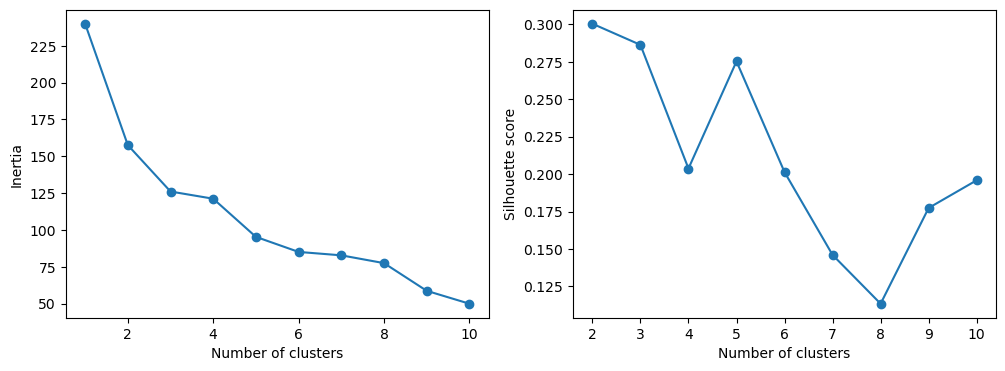

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []  # inertia
ss = []  # silhouette score
test_clusters = 10
for cluster in range(1,test_clusters+1):
    kmeans = KMeans(n_clusters=cluster, n_init="auto")
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    labels = kmeans.predict(data_scaled)
    if cluster > 1:
        ss.append(silhouette_score(data_scaled, labels))

# converting the results into a dataframe and plotting them
frame_in = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'SSE':SSE}) 
frame_ss = pd.DataFrame({'Cluster':range(2,test_clusters+1), 'Silhouette score': ss})
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(frame_in['Cluster'], frame_in['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
#plt.xticks(frame.Cluster[1::2]);
plt.subplot(1,2,2)
plt.plot(frame_ss['Cluster'], frame_ss['Silhouette score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Basándonos en el gráfico anterior (panel izquierdo), podemos identificar un punto donde el comportamiento cambia abruptamente, lo que se conoce como un "codo". Este punto puede sugerir un valor óptimo para el número de clústeres, que podría ser 2, 3 o incluso 6 para nuestro ejemplo. Sin embargo, más allá de estas técnicas automáticas, es crucial realizar un análisis descriptivo y exploratorio de los clústeres seleccionados para tomar una decisión informada sobre su valor. Esto implica examinar las características y el comportamiento de cada clúster, así como su relevancia y coherencia con el contexto del problema que estamos abordando, en particular usaremos dos clústeres para K-Means. 

En el análisis de silhouette (panel derecho), hemos encontrado que el coeficiente de silhouette es máximo para 2 clusters. Esto sugiere que dividir los datos en 2 clusters proporciona la mejor combinación de cohesión dentro de los clusters y separación entre ellos, lo que resulta en una estructura de clustering más clara y distintiva.

En un análisis de silhouette, buscamos el número óptimo de clusters donde se maximiza el coeficiente de silhouette. Este coeficiente refleja la cohesión dentro de los clusters y la separación entre los clusters. Al observar los valores del coeficiente de silhouette para diferentes números de clusters, podemos identificar el punto donde se alcanza el máximo valor, lo que indica la estructura óptima de los clusters en función de la distribución de los datos.


### Análisis de codo

El análisis de codo (figura arriba) es una técnica utilizada en K-Means y otros algoritmos de clustering para determinar el número óptimo de clusters (k) que deberían ser utilizados en la agrupación de datos. La idea principal es observar cómo varía la suma de las distancias cuadradas intra-cluster (inertia) en función del número de clusters. La "inertia" mide cuánto se extienden los puntos dentro de cada cluster.

El análisis de codo implica realizar el siguiente procedimiento:

1. Aplicar el algoritmo K-Means para diferentes valores de k (por ejemplo, k desde 1 hasta un número máximo predefinido).
2. Para cada valor de k, calcular la suma de las distancias cuadradas intra-cluster (inertia) de todas las instancias al centroide más cercano.
3. Graficar estos valores en función de k.
4. Observar el gráfico y buscar el punto donde la disminución en la inertia se "quiebra" o disminuye más lentamente, formando una curva que se asemeja a un "codo".

La idea es que la inertia disminuirá a medida que aumentamos el número de clusters, pero la disminución será menos pronunciada después de cierto punto. El codo en el gráfico corresponde al punto donde el beneficio de añadir más clusters disminuye significativamente, y a menudo se elige como el número óptimo de clusters para el análisis.

La inercia es una medida de cuán dispersos están los puntos dentro de cada cluster. Se calcula como la suma de las distancias cuadradas de cada punto al centroide más cercano de su cluster. 

1. Se calcula la distancia euclidiana al cuadrado entre cada punto y el centroide de su cluster.
2. Se suman estas distancias cuadradas para todos los puntos dentro del mismo cluster.
3. Se repite este proceso para todos los clusters.
4. Finalmente, se suman las inercias de todos los clusters para obtener la inercia total del modelo.

Es importante tener en cuenta que el análisis de codo es una técnica heurística y no siempre proporciona una respuesta clara y única. Además, el número óptimo de clusters puede variar según la naturaleza de los datos y los objetivos del análisis.

### Método de silhouette

El método de silhouette es una técnica de evaluación de clustering que se utiliza para determinar el número óptimo de clusters en un conjunto de datos. Funciona calculando el coeficiente de silhouette para cada punto de datos, que es una medida de cuán similar es un punto a su propio clúster en comparación con otros clústeres.

El coeficiente de silhouette oscila entre -1 y 1. Un valor cercano a 1 indica que el punto está bien agrupado en su propio clúster y separado de otros clústeres, mientras que un valor cercano a -1 indica que el punto podría haber sido asignado al clúster incorrecto. Un valor de 0 indica que el punto está en el límite entre dos clústeres.

Para determinar el número óptimo de clusters, primero calculamos el coeficiente promedio de silhouette para diferentes números de clusters (por ejemplo, desde 2 hasta un máximo definido). Luego, graficas los valores del coeficiente de silhouette en función del número de clusters y buscas el valor más alto. Este valor más alto indica el número óptimo de clusters, ya que representa la mejor separación entre los clústeres.

Queremos el número de clusters que maximice el coeficiente de silhouette, ya que indica la mayor cohesión intra-cluster y la mayor separación inter-cluster. Es importante tener en cuenta que el método de silhouette es una herramienta útil, pero no definitiva, y puede ser complementado con otras técnicas de evaluación de clustering para obtener una visión más completa del conjunto de datos.

El coeficiente de silhouette se calcula para cada punto de datos $ i $ en función de la distancia promedio dentro del mismo cluster ($ a_i $) y la distancia promedio al clúster más cercano ($ b_i $). La fórmula para el coeficiente de silhouette ($ s_i $) para un punto de datos específico es la siguiente:

$$ s_i = \frac{b_i - a_i}{\max(a_i, b_i)} $$

Donde:
- $ a_i $ es la distancia promedio entre el punto $ i $ y todos los demás puntos en el mismo cluster.
- $ b_i $ es la distancia promedio entre el punto $ i $ y todos los puntos en el clúster más cercano (diferente del clúster al que pertenece $ i $).

El coeficiente de silhouette para un conjunto de datos se calcula tomando el promedio de los coeficientes de silhouette de todos los puntos de datos en el conjunto. Un coeficiente de silhouette cercano a 1 indica una buena separación entre los clusters, mientras que un valor cercano a -1 indica que los puntos podrían haber sido asignados a clusters incorrectos. Un valor de 0 indica que los puntos están en el límite entre dos clusters.

- Vamos a acompañar nuestro análisis de clustering de un **Análisis de Componentes Principales** (vea el sigiuente [notebook](https://nbviewer.org/github/marsgr6/EN-online/blob/main/dimensionality_reduction.ipynb)).

<a name="pca"></a>
### Análisis de Componentes Principales

Es común utilizar PCA (Análisis de Componentes Principales) para representar clusters porque PCA nos permite reducir la dimensionalidad de nuestros datos al tiempo que conserva la mayor cantidad posible de información. Esto es especialmente útil cuando trabajamos con conjuntos de datos de alta dimensionalidad, donde puede ser difícil visualizar la estructura de los datos en su forma original. Al reducir la dimensionalidad con PCA, podemos representar los datos en un espacio de menor dimensión, lo que facilita la visualización y la interpretación de la distribución de los clústeres. Además, PCA ayuda a resaltar las principales tendencias y relaciones en los datos, lo que puede ser útil para identificar patrones significativos entre las observaciones y los clústeres.

Si observas separabilidad de los clusters en PCA, significa que las observaciones pertenecientes a diferentes clusters están distribuidas de manera distintiva en el espacio de las componentes principales. Esto sugiere que los clusters son relativamente homogéneos dentro de sí mismos y están bien diferenciados entre sí en términos de las variables originales.

Una buena separabilidad indica que el método de clustering ha identificado patrones claros en los datos que permiten agrupar las observaciones de manera efectiva. Por otro lado, si la separabilidad es baja, significa que las observaciones de diferentes clusters están más dispersas y mezcladas en el espacio de las componentes principales, lo que indica que los clusters pueden ser menos distintivos o que la técnica de clustering no ha capturado adecuadamente la estructura subyacente de los datos.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # dos componentes principales

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

# dos clusters para KMeans
kmeans = KMeans(n_clusters=2, n_init="auto").fit(data_scaled)

pc_transformation['Cluster'] = kmeans.labels_.astype('str')

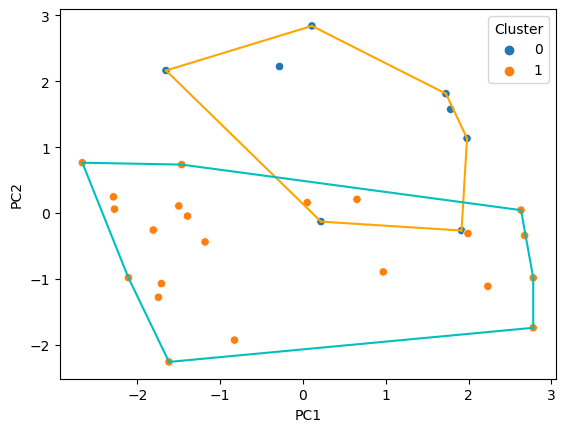

In [15]:
from scipy.spatial import ConvexHull

def plot_convex_hull(data_hull, cl_method, colx="PC1", coly="PC2", color=['orange', 'c']):
    # Usa colx, coly para el scatterplot
    #cl_method: nombre de la columna de resultados de clustering, se usa para el hue
    # color, lista de colores, tantos como clusteres
    sns.scatterplot(x=data_hull[colx], y=data_hull[coly], hue=data_hull[cl_method])

    points = np.array(data_hull[[colx, coly]])
    points = points[np.where(data_hull[cl_method] == '0')[0]]
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color[0])

    points = np.array(data_hull[[colx, coly]])
    points = points[np.where(data_hull[cl_method] == '1')[0]]
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color[1])

plot_convex_hull(pc_transformation, 'Cluster')
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Podemos observar una clara separabilidad entre los clusters 0 y 1 al visualizar un scatterplot con las dos primeras componentes principales. Esto sugiere que utilizar 2 clusters es adecuado para nuestro análisis. Además, estas dos componentes principales explican el 60% de la varianza total en nuestros datos. La separabilidad entre los clusters indica que estos están bien definidos y tienen características distintivas entre sí en el espacio de las componentes principales.

In [16]:
print("Varianza explicada:", pca.explained_variance_ratio_.sum()*100, '%')

Varianza explicada: 60.00606285731007 %


### Proyección de Datos en el Nuevo Espacio (2 componentes principales)

El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad que busca transformar un conjunto de variables originales en un nuevo conjunto de variables, llamadas componentes principales, que son combinaciones lineales de las variables originales. Estas nuevas variables están ordenadas de tal manera que la primera componente principal captura la mayor cantidad de varianza en los datos, seguida de la segunda componente principal, y así sucesivamente.

Matemáticamente, supongamos que tenemos un conjunto de datos representado por una matriz $ X $ de dimensiones $ m \times n $, donde $ m $ es el número de observaciones y $ n $ es el número de variables originales. El objetivo de PCA es encontrar una matriz de proyección $ V $ de dimensiones $ n \times k $, donde $ k $ es el número deseado de componentes principales, de tal manera que al proyectar $ X $ sobre $ V $ obtengamos el nuevo conjunto de datos $ X_{Nuevo\ Espacio} $ de dimensiones $ m \times k $, donde cada fila de $ X_{Nuevo\ Espacio} $ representa las coordenadas de una observación en el espacio de las componentes principales.

La matriz $ V $ se obtiene de la descomposición de valores singulares (SVD) de la matriz de covarianza de los datos $ X $, o de la matriz de correlación si los datos están estandarizados. La matriz de proyección $ V $ está formada por los $ k $ autovectores correspondientes a los $ k $ valores singulares más grandes de la matriz de covarianza.

La transformación de los datos originales $ X $ en el nuevo espacio de características $ X_{Nuevo\ Espacio} $ se realiza mediante la siguiente fórmula:

$$ X_{Nuevo\ Espacio} = X V $$

Donde:
- $ X $ es la matriz de datos originales de dimensiones $ m \times n $ estandarizados.
- $ V $ es la matriz de proyección de dimensiones $ n \times k $.
- $ X_{Nuevo\ Espacio} $ es la matriz de datos transformados en el espacio de las componentes principales de dimensiones $ m \times k $.

Esta transformación nos permite representar las observaciones en un espacio de menor dimensión mientras se conserva la mayor cantidad posible de información. Las componentes principales son combinaciones lineales de las variables originales que están ordenadas de acuerdo a la cantidad de varianza que explican en los datos.

- Vea: https://nbviewer.org/github/marsgr6/EN-online/blob/main/dimensionality_reduction.ipynb

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Para nuestro ejemplo, dataset con $n=7$ tendríamos la siguiente proyección:

Para PC1:
$$ PC1 = v_{11}X_1 + v_{12}X_2 + v_{13}X_3 + \ldots + v_{17}X_7 $$

Para PC2:
$$ PC2 = v_{21}X_1 + v_{22}X_2 + v_{23}X_3 + \ldots + v_{27}X_7 $$

Donde:
- $ PC1 $ y $ PC2 $ son las dos primeras componentes principales.
- $ X_1, X_2, \ldots, X_7 $ son las siete variables originales.
- $ v_{11}, v_{12}, \ldots, v_{27} $, son los coeficientes de ponderación (cargas) de cada variable en las componentes principales, obtenidos a partir de $V$. Note que $i \in \{1, \ldots, k\}$ y $j \in \{1, \ldots, n\}$ para $v_{ij}$, con $k=2$ componentes principales, y $n=7$ variables en nuestro dataset.

Para nuestro problema tendríamos:

|        |        PC1 |        PC2 |
|:-------|-----------:|-----------:|
| SUS    | -0.0870081 | -0.477181  |
| Time   |  0.375705  |  0.403644  |
| ID     |  0.488444  |  0.0601633 |
| Gender |  0.319527  |  0.314466  |
| Age    |  0.422783  |  0.0517899 |
| Kinect | -0.362757  |  0.360633  |
| NUI    | -0.198831  |  0.553963  |
| Games  | -0.40091   |  0.259322  |

$$PC1 = -0.087 \times SUS + 0.3757 \times Time + 0.4884 \times ID + 0.3195 \times Gender + 0.4228 \times Age -0.3628 \times Kinect -0.1988 \times NUI - 0.4009 \times Games$$

$$PC2 = -0.4772 \times SUS+0.4036 \times Time+0.0602 \times ID+0.3145 \times Gender+0.0518 \times Age+0.3606 \times Kinect+0.554 \times NUI+0.2593 \times Games$$

**Realicemos el cálculo numérico:**

Seleccionamos nuestra primera observación $X$ (`data_scaled[0]`) y multiplicamos por $V$ (`pca.components_.T`):

Los valores `[-1.65354269,  2.16363011]` corresponden a la primera observación en el nuevo espacio proyectado. 

In [17]:
print("X:", np.round(data_scaled[0], 4))
print("V:", pca.components_.T)
print("X Nuevo Espacio:", np.dot(data_scaled[0], pca.components_.T))

X: [-2.3368  0.9899 -1.     -0.7071 -0.8032  1.8419 -0.0443  1.2857]
V: [[-0.08700811 -0.47718141]
 [ 0.37570515  0.40364357]
 [ 0.48844377  0.06016326]
 [ 0.31952703  0.31446557]
 [ 0.42278271  0.05178989]
 [-0.36275684  0.36063301]
 [-0.19883136  0.55396327]
 [-0.40090989  0.25932199]]
X Nuevo Espacio: [-1.65354269  2.16363011]


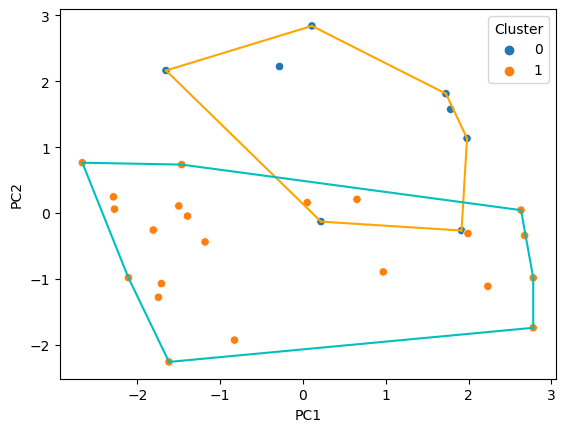

In [18]:
pca_projection = pd.DataFrame(np.dot(data_scaled, pca.components_.T), columns=["PC1", "PC2"])
pca_projection['Cluster'] = kmeans.labels_.astype('str')
plot_convex_hull(pca_projection, 'Cluster')
plt.show()

In [19]:
first_2_components = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2"], index=data.columns)
first_2_components

PC1       PC2
SUS    -0.087008 -0.477181
Time    0.375705  0.403644
ID      0.488444  0.060163
Gender  0.319527  0.314466
Age     0.422783  0.051790
Kinect -0.362757  0.360633
NUI    -0.198831  0.553963
Games  -0.400910  0.259322

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

|        |        PC1 |        PC2 |
|:-------|-----------:|-----------:|
| SUS    | -0.0870081 | **-0.477181**  |
| Time   |  0.375705  |  **0.403644**  |
| ID     |  **0.488444**  |  0.0601633 |
| Gender |  **0.319527**  |  0.314466  |
| Age    |  **0.422783**  |  0.0517899 |
| Kinect | -0.362757  |  0.360633  |
| NUI    | -0.198831  |  **0.553963**  |
| Games  | -0.40091   |  0.259322  |

Podemos observar que la primera componente principal (PC1) está relacionada con las variables `ID`, `Age` y `Gender`, ya que tienen los valores absolutos más altos en la carga correspondiente a esta componente. Por otro lado, la segunda componente principal (PC2) muestra una relación significativa con las variables `NUI`, `SUS`y `Time`, dado que tienen los valores absolutos más altos en la carga de esta componente.

Vea el [anexo](#anexo) para una análisis más completo usando un `biplot`.

### Algunas consideraciones adicionales

No es estrictamente necesario estandarizar los datos antes de realizar un Análisis de Componentes Principales (PCA), pero es una práctica común y recomendada en muchos casos por las siguientes razones:

1. **Equilibrio de Escalas**: Si las variables originales tienen diferentes escalas o unidades de medida, es posible que una variable con una escala mucho más grande domine el cálculo de las componentes principales. La estandarización ayuda a equilibrar las escalas y garantiza que todas las variables contribuyan de manera similar al análisis.

2. **Impacto de la Varianza**: PCA se basa en la varianza de las variables para calcular las componentes principales. Si una variable tiene una varianza mucho mayor que otras, tendrá un impacto desproporcionado en el análisis. La estandarización ajusta las varianzas de todas las variables a 1, lo que asegura que cada variable contribuya de manera equitativa a la determinación de las componentes principales.

3. **Interpretación de las Componentes**: Cuando los datos no están estandarizados, las componentes principales pueden ser difíciles de interpretar, ya que los coeficientes de las variables originales pueden variar ampliamente en magnitud. La estandarización asegura que los coeficientes de las variables en las componentes principales sean más comparables y fáciles de interpretar.

4. **Sensibilidad a Outliers**: PCA es sensible a los valores atípicos en los datos. La estandarización ayuda a mitigar este efecto al reducir la influencia de los valores extremos en el cálculo de las componentes principales.

En resumen, aunque no es obligatorio estandarizar los datos antes de realizar PCA, hacerlo suele ser una buena práctica que puede mejorar la interpretación y la estabilidad del análisis, especialmente cuando las variables tienen diferentes escalas o unidades de medida.

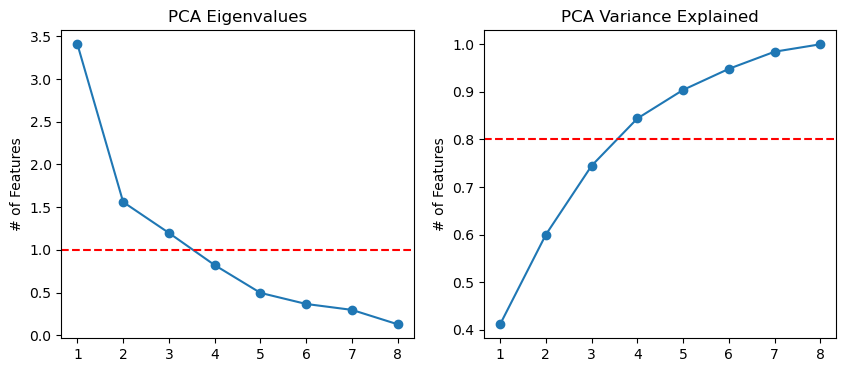

In [20]:
pca = PCA(n_components=len(data.columns)).fit(data_scaled)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1,len(data.columns)+1), pca.explained_variance_, '-o')
plt.axhline(y=1, color='r', linestyle='--')
plt.ylabel("Eigenvalues")
plt.ylabel("# of Features")
plt.title("PCA Eigenvalues")

plt.subplot(1,2,2)
plt.plot(range(1,len(data.columns)+1), pca.explained_variance_ratio_.cumsum(), '-o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.ylabel("% Variance Explained")
plt.ylabel("# of Features")
plt.title("PCA Variance Explained")
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

En el gráfico de valores propios (Eigenvalues) del PCA (Análisis de Componentes Principales), podemos observar que tres componentes tienen un valor propio mayor a 1, lo que sugiere que retener tres componentes puede ser apropiado. Estas tres componentes explican aproximadamente el 75% de la varianza total de los datos. Por otro lado, si optamos por reducir a dos componentes, estas explican alrededor del 60% de la varianza. Es común seleccionar un número de componentes que explique al menos el 80% de la varianza total, como lo indica la línea roja discontinua en el panel izquierdo del gráfico.

Anteriormente, utilizamos dos componentes para representar la separabilidad de los clústeres en un diagrama de dispersión bidimensional. En esta ocasión, vamos a emplear tres componentes para representar los clústeres en un espacio tridimensional.

In [21]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2', 'PC3'])

pc_transformation['Cluster'] = pd.Categorical(kmeans.labels_)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


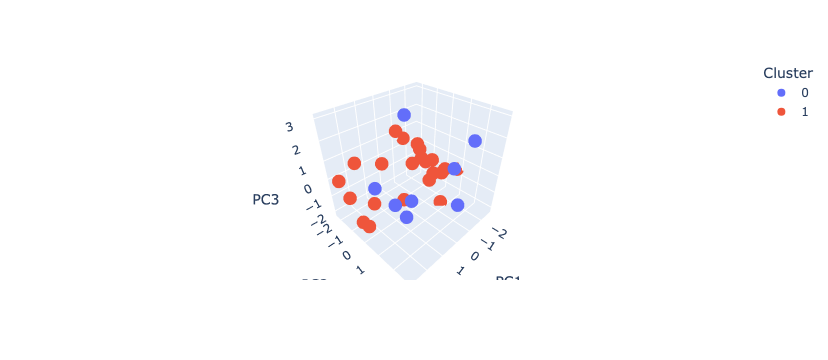

In [22]:
import plotly.express as px

fig = px.scatter_3d(pc_transformation, x='PC1', y='PC2', z='PC3',
              color='Cluster')
fig.show()

- Las cargas de las primeras 3 componentes corresponderían a la siguiente tabla:

In [23]:
pca = PCA(n_components=3).fit(data_scaled)

first_3_components = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3"], index=data.columns)
first_3_components

PC1       PC2       PC3
SUS    -0.087008 -0.477181 -0.610437
Time    0.375705  0.403644 -0.099800
ID      0.488444  0.060163  0.136441
Gender  0.319527  0.314466 -0.427072
Age     0.422783  0.051790  0.177914
Kinect -0.362757  0.360633  0.401363
NUI    -0.198831  0.553963 -0.466184
Games  -0.400910  0.259322 -0.079534

<a name="kmodes"></a>
### K-modes

El algoritmo k-modes está diseñado específicamente para manejar datos categóricos. A diferencia del algoritmo k-means, que trabaja con variables numéricas, el k-modes se utiliza para clustering en conjuntos de datos que contienen variables categóricas.

El k-modes se basa en la idea de encontrar modas (valores más frecuentes) en lugar de centroides como en k-means. El objetivo del k-modes es agrupar instancias que sean similares en términos de sus características categóricas, utilizando una medida de distancia basada en la cantidad de coincidencias o desacuerdos en las categorías.

Cuando se aplican métodos de clustering a datos categóricos, es importante utilizar algoritmos diseñados para manejar esa naturaleza específica de los datos. K-modes es una extensión natural de k-means que se adapta bien a variables categóricas y es una opción común en situaciones donde se trabaja principalmente con atributos discretos o categóricos.

### K-Modes: Algoritmo

1. **Inicialización de Centroides:**
   - Dados $k$ clusters a formar, se seleccionan $k$ modas iniciales $M_1, M_2, ..., M_k$ como centroides.

2. **Asignación de Instancias:**
   - Dada una instancia $X_i$ con características categóricas $C_{i1}, C_{i2}, ..., C_{ip}$, se asigna a la clase $j$ cuyo centroide $M_j$ minimiza la distancia de coincidencias o desacuerdos en categorías.
   - La distancia $d(X_i, M_j)$ se mide por la cantidad de categorías en las que $X_i$ y $M_j$ difieren.

3. **Actualización de Centroides:**
   - Para cada cluster $j$, se actualiza el centroide $M_j$ como la moda (valor más frecuente) en cada categoría entre las instancias asignadas al cluster.

4. **Función Objetivo:**
   - No hay una función objetivo global como en K-Means, pero el objetivo es minimizar la distancia categórica entre instancias y centroides dentro de cada cluster.

5. **Iteración:**
   - Se repiten los pasos de asignación y actualización hasta que la asignación de instancias a clusters ya no cambia significativamente.

K-Modes es un algoritmo que adapta la noción de modas y medidas de distancia específicas para datos categóricos, buscando agrupar instancias similares en términos de sus características categóricas.

En el algoritmo K-Modes, la distancia entre dos instancias $X_i$ y $M_j$ se mide utilizando la distancia de coincidencias o desacuerdos en categorías. Dado que estamos tratando con variables categóricas, la distancia categórica es una medida que cuantifica la discrepancia entre las categorías de dos puntos.

Sea $C_{ik}$ la categoría de la característica $k$ en la instancia $X_i$ y $M_{jk}$ la categoría correspondiente en el centroide $M_j$, la distancia categórica entre $X_i$ y $M_j$ se puede definir como:

$$ d(X_i, M_j) = \sum_{k=1}^{p} \delta(C_{ik}, M_{jk}) $$

donde:
- $p$ es el número de características categóricas en cada instancia.
- $\delta(C_{ik}, M_{jk})$ es una función delta de Kronecker que devuelve 0 si $C_{ik}$ es igual a $M_{jk}$ y 1 en caso contrario.

La distancia categórica simplemente suma 1 por cada categoría en la que las dos instancias difieren. En otras palabras, mide la cantidad de categorías en las que $X_i$ y $M_j$ no coinciden.

El objetivo del algoritmo K-Modes es minimizar esta distancia categórica en el proceso de asignación y actualización de centroides para formar clusters coherentes en términos de características categóricas.

### Discretización de nuestras variables numéricas `Time`y `SUS`

`KBinsDiscretizer` es una clase proporcionada por la biblioteca scikit-learn en Python, diseñada para discretizar (dividir en bins o intervalos) características numéricas en conjuntos de datos. Este proceso es útil cuando se desea convertir variables continuas en categorías discretas. La discretización puede ser beneficiosa en ciertos casos, como cuando se trabaja con algoritmos que requieren características categóricas o cuando se busca manejar la multicolinealidad en modelos lineales.

Aquí hay una explicación de los principales aspectos de `KBinsDiscretizer`:

- Uso Básico:

En este ejemplo:
- `n_bins` especifica el número de bins o intervalos que deseamos crear.
- `encode` determina cómo se codificarán las etiquetas (ordinal, onehot o onehot-dense).
- `strategy` indica la estrategia para definir los bins ('uniform', 'quantile', o 'kmeans').

- Parámetros Principales:

- **n_bins:** Número de bins (intervalos) a generar.
- **encode:** Método para codificar las etiquetas de los bins. Puede ser 'ordinal', 'onehot', o 'onehot-dense'.
- **strategy:** Estrategia para definir los bins. 'uniform' crea bins de igual ancho, 'quantile' crea bins con la misma cantidad de puntos, y 'kmeans' usa k-means clustering para definir los bins.

- Atributos Importantes:

  - **bin_edges_:** Los límites de los bins después de ajustar el transformador.

- Uso de las Etiquetas:

- Si `encode` es 'ordinal', las etiquetas son valores enteros.
- Si `encode` es 'onehot' o 'onehot-dense', las etiquetas son matrices binarias indicando la pertenencia a cada bin.

`KBinsDiscretizer` es útil cuando se necesita discretizar características numéricas en bins para adaptarse mejor a ciertos modelos o para abordar problemas específicos en el análisis de datos.

En el fragmento de código en la celda siguiente, está creando un objeto `KBinsDiscretizer` con ciertos parámetros específicos. Aquí está la explicación de esos parámetros:

```python
from sklearn.preprocessing import KBinsDiscretizer

# Crear el transformador KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans', subsample=None)
```

- **`n_bins=3`:** Indica que se crearán 3 bins o intervalos para discretizar las características numéricas.

- **`encode='ordinal'`:** Las etiquetas de los bins se codificarán como valores enteros. En otras palabras, después de aplicar la discretización, cada valor numérico se asignará a un bin específico representado por un valor entero.

- **`strategy='kmeans'`:** Esta opción indica que la estrategia para definir los bins se basará en el algoritmo K-Means clustering. K-Means se utilizará para identificar los límites óptimos de los bins.

- **`subsample=None`:** Este parámetro determina si se debe realizar un submuestreo (subsampleo) de los datos antes de aplicar la discretización. En este caso, se establece en `None`, lo que significa que no se realizará submuestreo.

`KBinsDiscretizer` se utilizó para discretizar las características numéricas en 3 bins utilizando el algoritmo K-Means para definir los límites de los bins, y las etiquetas de los bins se representarán como valores enteros. Este proceso puede ser útil en situaciones donde se desea convertir características numéricas en categorías discretas utilizando la técnica de K-Means.

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans', subsample=None)
data_disc = data.copy()

data_disc[['SUS', 'Time']] = discretizer.fit_transform(data[data.columns[:2]]).astype('int')

bin_response = {i: v for i,v in enumerate(['low', 'medium', 'high'])}
print(bin_response)

col_r = ['SUS', 'Time']  # column to replace values

[data_disc.replace({col: bin_response}, inplace=True) for col in col_r];

data_disc

{0: 'low', 1: 'medium', 2: 'high'}


SUS    Time        ID Gender     Age   Kinect      NUI    Games
0      low    high   student      M  twenty     high  average     high
1     high  medium   student      M  twenty     high     high     high
2     high     low   student      M  twenty  average  average     high
3     high  medium   student      F  twenty  average     high     high
4     high  medium   student      M  twenty  average  average     high
5     high  medium   student      M  twenty  average     high     high
6   medium  medium   student      M  twenty  average  average  average
7     high     low   student      M  twenty  average     high     high
8     high  medium   student      M  twenty  average     high  average
9   medium    high  employee      F   forty  average     high     none
10     low    high   student      F  twenty  average     high  average
11  medium  medium  employee      M  twenty  average  average  average
12    high     low   student      M  twenty  average     none     high
13    high  medium   student      M  twenty  average     high  average
14  medium     low   student      M  twenty  average     none     none
15    high     low   student      M  twenty  average  average  average
16    high     low   student      M  twenty  average     none  average
17     low     low  employee      M  thirty     high     none  average
18     low    high  employee      F   forty  average  average  average
19  medium    high  employee      M   forty     none     none     none
20  medium    high  employee      M  thirty     high     high     high
21    high    high  employee      M   forty  average     none  average
22  medium    high  employee      M  thirty     none  average  average
23    high    high  employee      F  twenty  average  average  average
24    high    high  employee      F   forty     none  average     none
25  medium    high  employee      F  thirty  average  average  average
26    high    high  employee      M  thirty     none     none     none
27    high    high  employee      F  thirty     none  average  average
28    high    high  employee      F   forty     none     none     none
29    high  medium  employee      F  thirty     none  average  average

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

**Visualizamos el resultado de la discretización**

En el diagrama de dispersión, se representan las variables numéricas SUS (eje x) y Time (eje y), junto con el resultado de la discretización. Se utiliza el atributo `hue` para representar las categorías de SUS y el atributo `style` para las categorías de Time. Las líneas discontinuas horizontales y verticales indican los umbrales de corte para estas nuevas categorías. Las líneas verticales azules representan los umbrales de corte para la variable SUS (eje x), mientras que las líneas horizontales en negro representan los umbrales de corte para la variable Time (eje y). Estas líneas proporcionan una guía visual para interpretar cómo se han agrupado los datos en función de estos umbrales de corte en el proceso de discretización. Estas guías son ilustrativas en cada una de las dimensiones, el proceso como tal es bivariado, usando KMeans. 

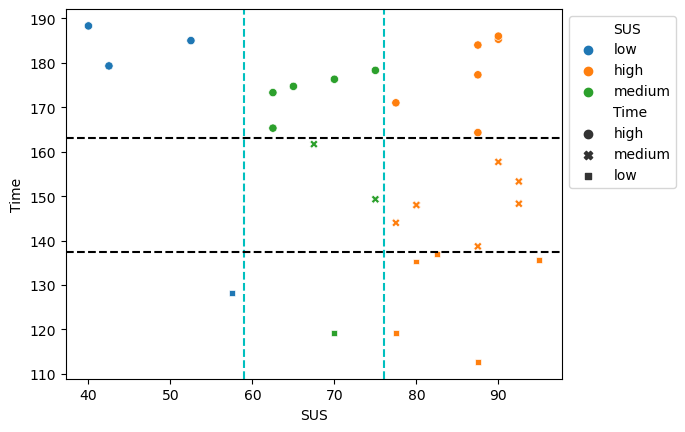

In [25]:
ax = sns.scatterplot(data=data, x="SUS", y="Time", hue=data_disc.SUS, style=data_disc.Time)
ax.axvline(59, c='c', ls="--")
ax.axvline(76, c="c", ls="--")
ax.axhline(137.5, c='k', ls="--")
ax.axhline(163, c="k", ls="--")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

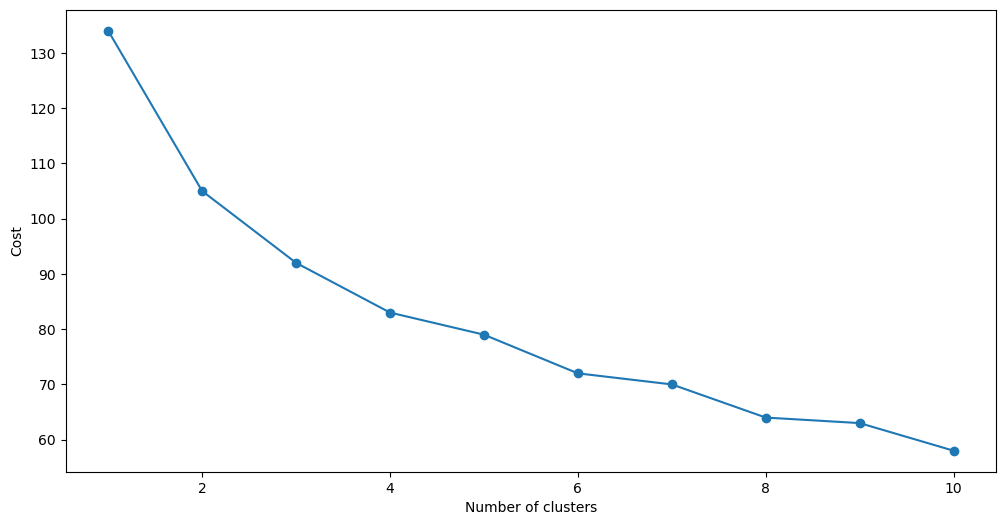

In [26]:
from kmodes.kmodes import KModes

# Elbow curve to find optimal K*
cost = []
test_clusters = 10

for num_clusters in range(1, test_clusters+1):
    kmodes = KModes(n_clusters=num_clusters, init = "random")
    kmodes.fit_predict(data)
    cost.append(kmodes.cost_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'Cost':cost})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Cost'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.xticks(frame.Cluster[1::2]);
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

En el análisis de codo para KModes, hemos identificado dos puntos de inflexión significativos en el costo, que se observan en 2 y 6 clusters respectivamente. Estos puntos indican un cambio notable en el comportamiento del costo a medida que aumenta el número de clusters. Por lo tanto, estos son valores potenciales para considerar como el número óptimo de clusters para nuestro análisis.

## Costo (medida de disimilitud)

El costo en KModes es una medida que se utiliza para evaluar la calidad de un agrupamiento realizado por el algoritmo KModes. En KModes, el costo se refiere a la suma de las distancias entre cada punto de datos y el centroide de su respectivo grupo, donde la distancia se mide utilizando una métrica específica diseñada para variables categóricas.

Dado que KModes es una variante del algoritmo KMeans que se utiliza para datos categóricos en lugar de datos numéricos, la medida de distancia se adapta para manejar variables categóricas. En lugar de la distancia euclidiana utilizada en KMeans, en KModes se utiliza una medida de disimilitud adecuada para variables categóricas, como la distancia de Hamming o la distancia de coincidencia.

El objetivo del algoritmo KModes es minimizar este costo, es decir, encontrar los centroides óptimos que minimicen la distancia entre los puntos de datos y sus centroides respectivos dentro de cada grupo. Por lo tanto, el costo se utiliza como criterio de optimización durante el proceso de agrupamiento para ajustar los centroides de manera que los grupos sean lo más homogéneos posible en términos de características categóricas.

- **Investigue los parámetros para la implementación de `k-modes` usada:**

```
Parameters
    -----------
    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.
    max_iter : int, default: 300
        Maximum number of iterations of the k-modes algorithm for a
        single run.
    cat_dissim : func, default: matching_dissim
        Dissimilarity function used by the algorithm for categorical variables.
        Defaults to the matching dissimilarity function.
    init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
        Method for initialization:
        'Huang': Method in Huang [1997, 1998]
        'Cao': Method in Cao et al. [2009]
        'random': choose 'n_clusters' observations (rows) at random from
        data for the initial centroids.
        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centroids.
    n_init : int, default: 10
        Number of time the k-modes algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of cost.
    verbose : int, optional
        Verbosity mode.
```

In [27]:
kmodes = KModes(n_clusters=2, init = "random")
kmodes.fit_predict(data)

data_disc["Cluster"] = pd.Categorical(kmodes.labels_)

In [28]:
data_disc

SUS    Time        ID Gender     Age   Kinect      NUI    Games Cluster
0      low    high   student      M  twenty     high  average     high       1
1     high  medium   student      M  twenty     high     high     high       1
2     high     low   student      M  twenty  average  average     high       1
3     high  medium   student      F  twenty  average     high     high       1
4     high  medium   student      M  twenty  average  average     high       1
5     high  medium   student      M  twenty  average     high     high       1
6   medium  medium   student      M  twenty  average  average  average       1
7     high     low   student      M  twenty  average     high     high       1
8     high  medium   student      M  twenty  average     high  average       1
9   medium    high  employee      F   forty  average     high     none       0
10     low    high   student      F  twenty  average     high  average       1
11  medium  medium  employee      M  twenty  average  average  average       0
12    high     low   student      M  twenty  average     none     high       1
13    high  medium   student      M  twenty  average     high  average       1
14  medium     low   student      M  twenty  average     none     none       1
15    high     low   student      M  twenty  average  average  average       1
16    high     low   student      M  twenty  average     none  average       1
17     low     low  employee      M  thirty     high     none  average       0
18     low    high  employee      F   forty  average  average  average       0
19  medium    high  employee      M   forty     none     none     none       0
20  medium    high  employee      M  thirty     high     high     high       1
21    high    high  employee      M   forty  average     none  average       0
22  medium    high  employee      M  thirty     none  average  average       0
23    high    high  employee      F  twenty  average  average  average       0
24    high    high  employee      F   forty     none  average     none       0
25  medium    high  employee      F  thirty  average  average  average       0
26    high    high  employee      M  thirty     none     none     none       0
27    high    high  employee      F  thirty     none  average  average       0
28    high    high  employee      F   forty     none     none     none       0
29    high  medium  employee      F  thirty     none  average  average       0

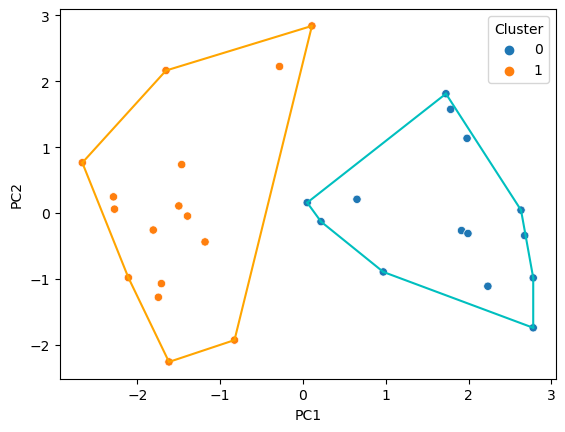

In [29]:
### Realicemos PCA
pca = PCA(n_components=2)  # dos componentes principales

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

sns.scatterplot(x=pc_transformation.PC1, y=pc_transformation.PC2, hue=data_disc.Cluster)

points = np.array(pc_transformation)
points = points[np.where(data_disc.Cluster == 0)[0]]
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'c')

points = np.array(pc_transformation)
points = points[np.where(data_disc.Cluster == 1)[0]]
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'orange')

plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Podemos observar una buena separación entre los dos clústeres obtenidos utilizando KModes. En este caso, estamos utilizando las componentes principales derivadas de la representación numérica de los datos utilizados anteriormente. Sin embargo, es importante destacar que existen técnicas similares a PCA que podrían ser exploradas para la representación de datos categóricos. Algunas de estas técnicas incluyen:

1. **Análisis de Correspondencias (CA)**: Es una técnica utilizada para analizar la asociación entre dos variables categóricas. El CA se basa en la descomposición de una matriz de frecuencia de ocurrencia en componentes principales. Proporciona una representación visual de las relaciones entre las categorías de las variables y puede utilizarse para reducir la dimensionalidad de los datos categóricos.

2. **Análisis de Correspondencias Múltiples (MCA)**: Es una extensión del CA que permite analizar la asociación entre más de dos variables categóricas. MCA generaliza los conceptos de PCA al contexto de datos categóricos y proporciona una forma de reducir la dimensionalidad de múltiples variables categóricas en un espacio de menor dimensión.

3. **Análisis de Componentes Principales Categóricas (CATPCA)**: Es una técnica que generaliza PCA al contexto de datos categóricos. CATPCA se utiliza para reducir la dimensionalidad de un conjunto de variables categóricas y encontrar las combinaciones lineales de estas variables que maximizan la varianza total explicada.

Estas técnicas son útiles para explorar la estructura subyacente de los datos categóricos, identificar patrones y reducir la dimensionalidad al aplicar algoritmos de clustering o análisis de segmentación en datos categóricos.

**Discusión adicional**

Manipular datos para clustering K-means numéricos implica normalmente la estandarización de las variables numéricas para que tengan la misma escala y varianza. Esto asegura que todas las variables contribuyan de manera equitativa al cálculo de las distancias entre observaciones. Para datos categóricos, especialmente en el contexto de K-modes, se convierten las variables categóricas en variables dummy (variables binarias) o se utilizan técnicas de codificación específicas para manejar datos categóricos. 

La elección entre datos numéricos y categóricos depende del tipo de variables que estén disponibles y de la naturaleza del problema. En general, K-means es más adecuado para variables numéricas, ya que se basa en la distancia euclidiana para agrupar observaciones. Sin embargo, si las variables son categóricas y no pueden ser transformadas en numéricas de manera significativa, entonces K-modes es más apropiado. Además, en algunos casos, una combinación de variables numéricas y categóricas puede proporcionar una representación más completa de los datos y mejorar la calidad de los clusters. En resumen, no hay una respuesta única sobre qué tipo de datos es mejor, ya que depende del contexto específico del problema y de la naturaleza de las variables disponibles.

<a name="gmm"></a>
### Gaussian Mixture Model (GMM)

Los modelos de mezcla gaussiana se pueden utilizar para agrupar datos no etiquetados de manera similar a k-means. Sin embargo, hay algunas ventajas al utilizar modelos de mezcla gaussiana en lugar de k-means.
k-means no tiene en cuenta la varianza (ancho de la curva en forma de campana).

Por ejemplo la varianza/covarianza determina la forma de la distribución.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/normal12.png)

El algoritmo k-means modela un círculo (o, en dimensiones superiores, una hiperesfera) en el centro de cada clúster, con un radio definido por el punto más alejado en el clúster.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/kmeans_circle.png)

Esto funciona bien cuando los datos son circulares. Sin embargo, cuando los datos tienen formas diferentes, terminamos con algo como esto.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/kmeans_circle1.png)

En contraste, los modelos de mezcla gaussiana GMM pueden manejar incluso clústeres no circulares.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/gmm_1.png)

### Modelos de Mezcla Gaussiana

Como su nombre indica, un modelo de mezcla gaussiana implica la mezcla (es decir, superposición) de varias distribuciones gaussianas. En lugar de identificar clústeres por centroides "más cercanos", ajustamos un conjunto de k gaussianas a los datos. Estimamos parámetros de la distribución gaussiana, como la media y la varianza para cada clúster, y el peso de un clúster. Después de aprender los parámetros para cada punto de datos, podemos calcular las probabilidades de que pertenezca a cada uno de los clústeres.

Cada distribución se multiplica por un peso $\pi$ ($\pi_1 + \pi_2 + \pi_3 = 1$) para tener en cuenta que no tenemos un número igual de muestras de cada categoría. En otras palabras, podríamos haber incluido solo 1000 personas de la clase de clúster rojo y 100,000 personas de la clase de clúster verde.

<u>Expectation-Maximization</u>

<b><u>Expectation</u></b>

El primer paso, conocido como el paso de expectativa o paso $E$, consiste en calcular la expectativa de las asignaciones de componente $C_k$ para cada punto de datos $x_i \in X$ dados los parámetros del modelo $\pi_k$, $\mu_k$ y $\sigma_k$.

<b><u>Maximization</u></b>

El segundo paso se conoce como el paso de maximización o paso $M$, que consiste en maximizar las expectativas calculadas en el paso $E$ con respecto a los parámetros del modelo. Este paso consiste en actualizar los valores de $\pi_k$, $\mu_k$ y $\sigma_k$.

Todo el proceso iterativo se repite hasta que el algoritmo converge, dando una estimación de máxima verosimilitud. Intuitivamente, el algoritmo funciona porque conocer la asignación de componente $C_k$ para cada $x_i$ facilita la resolución de $\pi_k$, $\mu_k$ y $\sigma_k$, mientras que conocer $\pi_k$, $\mu_k$ y $\sigma_k$ facilita la inferencia de $p(C_k|x_i)$. El paso de expectativa corresponde al último caso, mientras que el paso de maximización corresponde al primero. Así, alternando entre qué valores se asumen fijos o conocidos, se pueden calcular eficientemente estimaciones de máxima verosimilitud de los valores no fijos.

<u>Algoritmo</u>
Inicializar la media $\mu_k$, la matriz de covarianza $\Sigma_k$ y los coeficientes de mezcla $\pi_k$ con algunos valores aleatorios (u otros valores).
Calcular los valores $C_k$ para todos los k.
Nuevamente, estimar todos los parámetros usando los valores actuales de $C_k$.
Calcular la función de verosimilitud logarítmica.
Establecer algún criterio de convergencia.
Si el valor de la verosimilitud logarítmica converge a algún valor (o si todos los parámetros convergen a algunos valores), entonces detenerse; de lo contrario, regresar al Paso 2.

Este algoritmo solo garantiza que se llegue a un punto óptimo local, pero no garantiza que este óptimo local también sea el global. Por lo tanto, si el algoritmo se inicia desde diferentes puntos de inicialización, en general, aterriza en diferentes configuraciones.

![](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif)

### ANEXO: Resumen Matemático


### 1. Definición

**Número de Componentes (K):**

  - Selecciona el número de componentes (o clusters) que se desean encontrar en los datos. Este es un parámetro importante que generalmente se ajusta mediante métodos como el criterio de información bayesiano (BIC) o el criterio de información de Akaike (AIC).
  
  - Consideramos un modelo donde los datos se generan a partir de una mezcla de varias distribuciones gaussianas. La densidad de probabilidad de un punto es la suma ponderada de las densidades gaussianas correspondientes a cada componente.

   $$ p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) $$

   donde $ K $ es el número de componentes, $ \pi_k $ es el peso del componente $ k $, $ \boldsymbol{\mu}_k $ es la media y $ \boldsymbol{\Sigma}_k $ es la matriz de covarianza del componente $ k $.

### 2. Inicialización:

- **Parámetros Iniciales:**
  - Inicializa los parámetros del modelo, que incluyen las medias, covarianzas y pesos de cada componente. Una opción común es inicializar estos parámetros usando K-Means.
  - Consideramos un modelo donde los datos se generan a partir de una mezcla de varias distribuciones gaussianas. La densidad de probabilidad de un punto es la suma ponderada de las densidades gaussianas correspondientes a cada componente.

   $$ p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) $$

   donde $ K $ es el número de componentes, $ \pi_k $ es el peso del componente $ k $, $ \boldsymbol{\mu}_k $ es la media y $ \boldsymbol{\Sigma}_k $ es la matriz de covarianza del componente $ k $.

### 3. Expectation-Maximization (EM):

- **E-step (Expectation):**
  - Calcula las probabilidades de pertenencia de cada punto a cada componente (probabilidades posteriores) utilizando la regla de Bayes.

$$ \gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(\mathbf{x}_n | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(\mathbf{x}_n | \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j)} $$

- **M-step (Maximization):**
  - Actualiza los parámetros del modelo (medias, covarianzas y pesos) maximizando la función de verosimilitud de los datos, dadas las probabilidades de pertenencia calculadas en el paso E-step.

$$ \boldsymbol{\mu}_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) \mathbf{x}_n}{\sum_{n=1}^{N} \gamma(z_{nk})} $$

$$ \boldsymbol{\Sigma}_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) (\mathbf{x}_n - \boldsymbol{\mu}_k)(\mathbf{x}_n - \boldsymbol{\mu}_k)^T}{\sum_{n=1}^{N} \gamma(z_{nk})} $$

$$ \pi_k = \frac{1}{N} \sum_{n=1}^{N} \gamma(z_{nk}) $$

### 4. Iteración:

- **Iteración E-M:**
  - Repite los pasos E y M hasta que los parámetros convergen y no cambian significativamente.

### 5. Predicciones y Uso:

- **Asignación de Clases:**
  - Una vez entrenado, el modelo se puede utilizar para asignar clases o clusters a nuevos datos basándose en las probabilidades calculadas en el paso E.

### Principales Características:

- **Flexibilidad:**
  - GMM es más flexible que K-Means ya que permite modelar distribuciones más complejas que simplemente esféricas.

- **Soft Clustering:**
  - Proporciona asignaciones de pertenencia probabilísticas, lo que significa que cada punto puede pertenecer a múltiples clusters con diferentes probabilidades.

- **Modelo Paramétrico:**
  - Supone que los datos se generan a partir de una mezcla de distribuciones gaussianas y, por lo tanto, asume que los datos están distribuidos según un modelo paramétrico.
  
**El algoritmo de GMM (Gaussian Mixture Model) está diseñado principalmente para variables continuas.** Utiliza distribuciones gaussianas (también conocidas como distribuciones normales) para modelar la estructura de los datos. Por lo tanto, funciona mejor con conjuntos de datos que tienen características continuas o que pueden aproximarse a una distribución normal. Sin embargo, también se pueden aplicar técnicas de preprocesamiento para adaptar el algoritmo a datos categóricos o mixtos, aunque su rendimiento puede no ser tan efectivo como con datos puramente continuos.


### Trabajemos nuestro ejemplo en Python

El algoritmo `GaussianMixture` de `sklearn` es una herramienta poderosa para modelar datos con estructuras más complejas y es especialmente útil cuando los clusters tienen formas no esféricas o cuando hay solapamiento entre los clusters.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Para iniciar nuestro análisis con GMM, nos enfocaremos en las variables numéricas continuas, específicamente `Time` y `SUS`. Posteriormente, ampliaremos nuestro conjunto de datos para incluir las variables numéricas, que fueron previamente transformadas mediante `label encoding` de las variables categóricas, tal como se hizo en el análisis de KMeans.

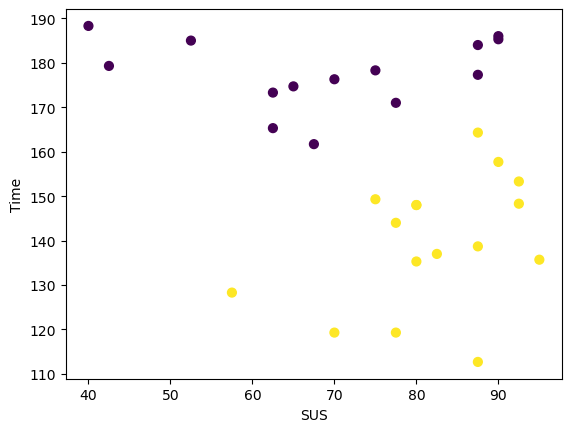

In [30]:
from sklearn.mixture import GaussianMixture as GMM
gmm_model = GMM(n_components=2,covariance_type='full')

# Model only using the numerical columns SUS y Time
X = np.array(encoded_data)[:,:2]
gmm_model.fit(X)
labels = gmm_model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel("SUS")
plt.ylabel("Time")
plt.show()

In [31]:
probs = np.round(gmm_model.predict_proba(X), 2)
probs

array([[1.  , 0.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.72, 0.28],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.92, 0.08],
       [0.99, 0.01],
       [0.32, 0.68],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.9 , 0.1 ],
       [0.  , 1.  ]])

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Es importante recordar que GMM (Gaussian Mixture Model) es un método suave de clustering que permite obtener las probabilidades de pertenencia (**arriba**) de las observaciones a cada uno de los clusters en nuestro problema de usabilidad. Las probabilidades diferentes de 1 indican los solapamientos de las distribuciones generadas por GMM, lo cual puede observarse en el gráfico como elipses (**siguiente celda**). Estas elipses representan las áreas donde las distribuciones de los clusters se superponen, lo que sugiere la posibilidad de que una observación pertenezca a más de un cluster con diferentes grados de certeza.

/tmp/ipykernel_419/2123052545.py:18: MatplotlibDeprecationWarning:

Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



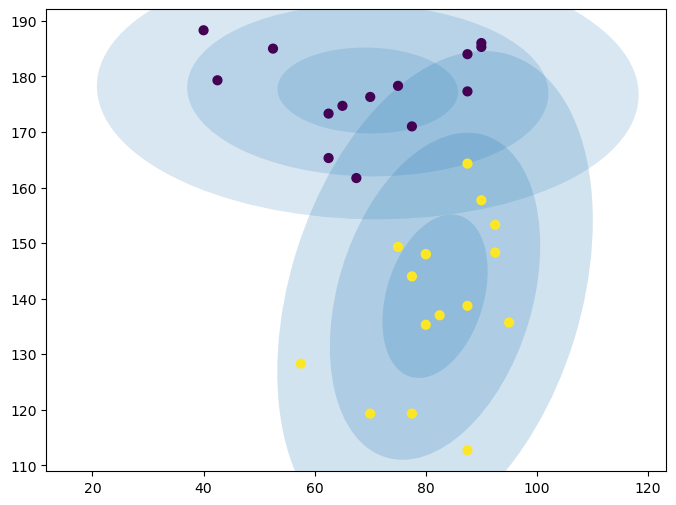

In [32]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None, ellipses=True):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    if ellipses:
        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_[:2], gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor)

    plt.show()

X = np.array(encoded_data)[:,:2]  # model with Time and SUS (first 2 columns)
gmm_model = GMM(n_components=2, random_state=42)
fig, ax = plt.subplots(figsize=(8, 6))
plot_gmm(gmm_model, X, ax=ax, ellipses=True)

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Podemos representar el resultado de GMM usando nuestras componentes principales, usando solo las variables continuas. 

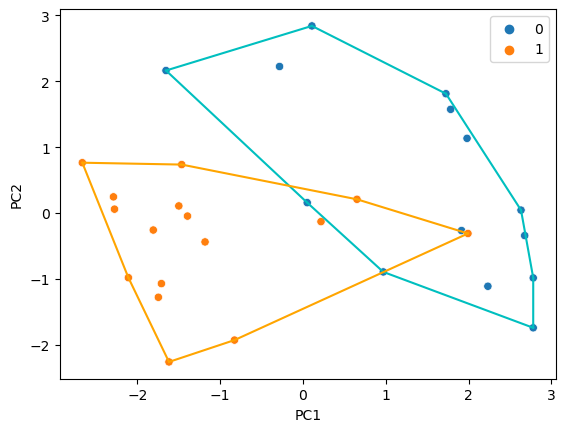

In [33]:
# Model with contiuous data Time, SUS
X = np.array(encoded_data)[:,:2]
gmm_model.fit(X)
labels_TS = gmm_model.predict(X)

points = np.array(pc_transformation)
points = points[np.where(labels_TS == 0)[0]]
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'c')

points = np.array(pc_transformation)
points = points[np.where(labels_TS == 1)[0]]
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'orange')

sns.scatterplot(x=pc_transformation.PC1, y=pc_transformation.PC2, hue=labels_TS)
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

- Para visualizar el resultado del clustering GMM, podemos emplear nuestras componentes principales utilizando todo el conjunto de datos numéricos.

- Sin embargo, es importante tener en cuenta que el rendimiento de GMM clustering puede no ser óptimo para variables no continuas. Esta limitación se hace evidente al observar la separabilidad de los clusters generados, los cuales ahora presentan solapamientos.

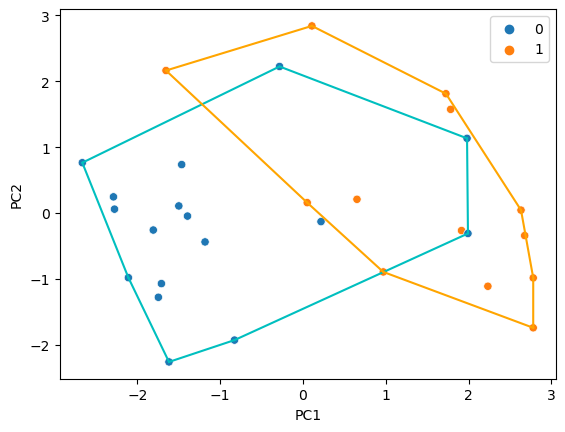

In [34]:
# Model with all numerical data as KMeans
X = np.array(encoded_data)
gmm_model.fit(X)
labels_all = gmm_model.predict(X)

points = np.array(pc_transformation)
points = points[np.where(labels_all == 0)[0]]
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'c')

points = np.array(pc_transformation)
points = points[np.where(labels_all == 1)[0]]
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'orange')

sns.scatterplot(x=pc_transformation.PC1, y=pc_transformation.PC2, hue=labels_all)
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Hasta el momento, hemos comparado tres modelos de clustering: KMeans, KModes y GMM. A continuación, aplicaremos dos técnicas adicionales: clustering basado en densidad y clustering jerárquico. Al finalizar la ejecución del notebook, se generará un dataframe con los datos originales, enriquecido con una columna adicional por cada método de clustering.

Como ejercicio, realizaremos una comparación de los diferentes métodos a través de un análisis exploratorio de los datos basado en estas columnas de etiquetas generadas por los algoritmos de agrupamiento. Esto nos permitirá evaluar la eficacia y el comportamiento de cada método en la tarea de agrupamiento de nuestros datos.

<a name="dbscan"></a>
### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

El Clustering Basado en Densidad se refiere a métodos de aprendizaje no supervisado que identifican grupos o clústeres distintivos en los datos, basándose en la idea de que un clúster en el espacio de datos es una región contigua de alta densidad de puntos, separada de otros clústeres similares por regiones contiguas de baja densidad de puntos.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) es un algoritmo base para el clustering basado en densidad. Puede descubrir clústeres de diferentes formas y tamaños a partir de una gran cantidad de datos, que pueden contener ruido y valores atípicos.

**Conceptos clave de DBSCAN**

DBSCAN es un algoritmo de agrupación basado en densidad que identifica clústeres en un conjunto de datos, tomando en cuenta la densidad local de los puntos.

1. **Vecindad de un Punto $p$:**
   - Sea $N_{\varepsilon}(p)$ el conjunto de puntos dentro de un radio $\varepsilon$ de $p$.
   - $N_{\varepsilon}(p) = \{q \mid \text{distancia}(p, q) \leq \varepsilon\}$.

2. **Punto Central (Núcleo):**
   - Un punto $p$ se considera un "punto central" si hay al menos $MinPts$ puntos en su vecindad $N_{\varepsilon}(p)$.

3. **Punto de Borde:**
   - Un punto $q$ se considera un "punto de borde" si está en la vecindad $N_{\varepsilon}(p)$ de un punto central $p$, pero no es central.

4. **Punto de Ruido:**
   - Un punto que no es central ni de borde se considera un "punto de ruido".

5. **Conexión Directa:**
   - Dos puntos $p$ y $q$ se consideran "directamente conexos" si $q \in N_{\varepsilon}(p)$ o viceversa.

6. **Conjunto Densamente Conectado:**
   - Un conjunto de puntos está "densamente conectado" si cada punto del conjunto es directamente conexo con cada otro punto del conjunto.

7. **Componente Densamente Conectada:**
   - Una "componente densamente conectada" es un conjunto máximo de puntos mutuamente densamente conectados.

8. **Algoritmo DBSCAN:**
   - Para cada punto $p$ en el conjunto de datos:
     - Si $p$ no ha sido visitado:
       - Si $p$ es un punto central, se forma una nueva componente densamente conectada.
       - Si $p$ es un punto de borde, se asigna al mismo componente que su punto central.
       - Si $p$ es un punto de ruido, se ignora.
   - El proceso se repite hasta que todos los puntos han sido visitados.

En resumen, DBSCAN agrupa puntos en componentes densamente conectadas, identificando puntos centrales y puntos de borde basándose en la densidad local. Puntos no asignados forman la categoría de ruido.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/dbscan_ani.gif)

**Estimación de Parámetros:**

Toda tarea de minería de datos tiene el problema de los (hiper)parámetros de los algoritmos. Cada parámetro influye en el algoritmo de maneras específicas. Para DBSCAN, se necesitan los parámetros $ \varepsilon $ y `minPts`.

- **`minPts`:** Como regla general, se puede derivar un mínimo `minPts` a partir del número de dimensiones $ D $ en el conjunto de datos, como $ \text{minPts} \geq D + 1 $. El valor bajo $ \text{minPts} = 1 $ no tiene sentido, ya que entonces cada punto por sí mismo ya será un clúster. Por lo tanto, $ \text{minPts} $ debe elegirse al menos como 3. Sin embargo, valores más grandes suelen ser mejores para conjuntos de datos con ruido y producirán clústeres más significativos. Como regla general, se puede utilizar $ \text{minPts} = 2 \cdot \text{dim} $, pero puede ser necesario elegir valores más grandes para conjuntos de datos muy grandes, para datos ruidosos o para datos que contienen muchos duplicados.

- **$ \varepsilon $:** El valor para $ \varepsilon $ puede elegirse utilizando un grafo de distancia $ k $, trazando la distancia al $ k = \text{minPts} - 1 $ vecino más cercano ordenado de mayor a menor valor. Buenos valores de $ \varepsilon $ son aquellos donde esta trama muestra un "codo": si $ \varepsilon $ se elige demasiado pequeño, una gran parte de los datos no se agrupará; mientras que para un valor de $ \varepsilon $ demasiado alto, los clústeres se fusionarán y la mayoría de los objetos estarán en el mismo clúster. En general, se prefieren valores pequeños de $ \varepsilon $ y, como regla general, solo una pequeña fracción de puntos debería estar dentro de esta distancia entre sí.

- **Función de Distancia:** La elección de la función de distancia está estrechamente vinculada a la elección de $ \varepsilon $ y tiene un impacto importante en los resultados. En general, será necesario identificar primero una medida razonable de similitud para el conjunto de datos antes de que se pueda elegir el parámetro $ \varepsilon $. No hay una estimación para este parámetro, pero las funciones de distancia deben elegirse apropiadamente para el conjunto de datos.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/DBSCAN-Illustration.svg.png)

In [35]:
from sklearn.cluster import DBSCAN

X = np.array(encoded_data)

dbscan=DBSCAN()

dbscan.fit(X)  # model with all data

dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### Método para determinar el valor óptimo de $\varepsilon$

El método consiste en calcular las distancias k-vecinas más cercanas en una matriz de puntos.

La idea es calcular el promedio de las distancias de cada punto a sus $k$ vecinos más cercanos. El valor de $k$ será especificado por el usuario y corresponde a MinPts.

A continuación, estas k-distancias se representan gráficamente en orden ascendente. El objetivo es determinar el "codo" que corresponde al parámetro $\varepsilon$ óptimo.

Un $\varepsilon$ corresponde a un valor umbral donde ocurre un cambio brusco a lo largo de la curva de k-distancias.

La función `kNNdistplot()` de Python se puede utilizar para dibujar el gráfico de k-distancias:

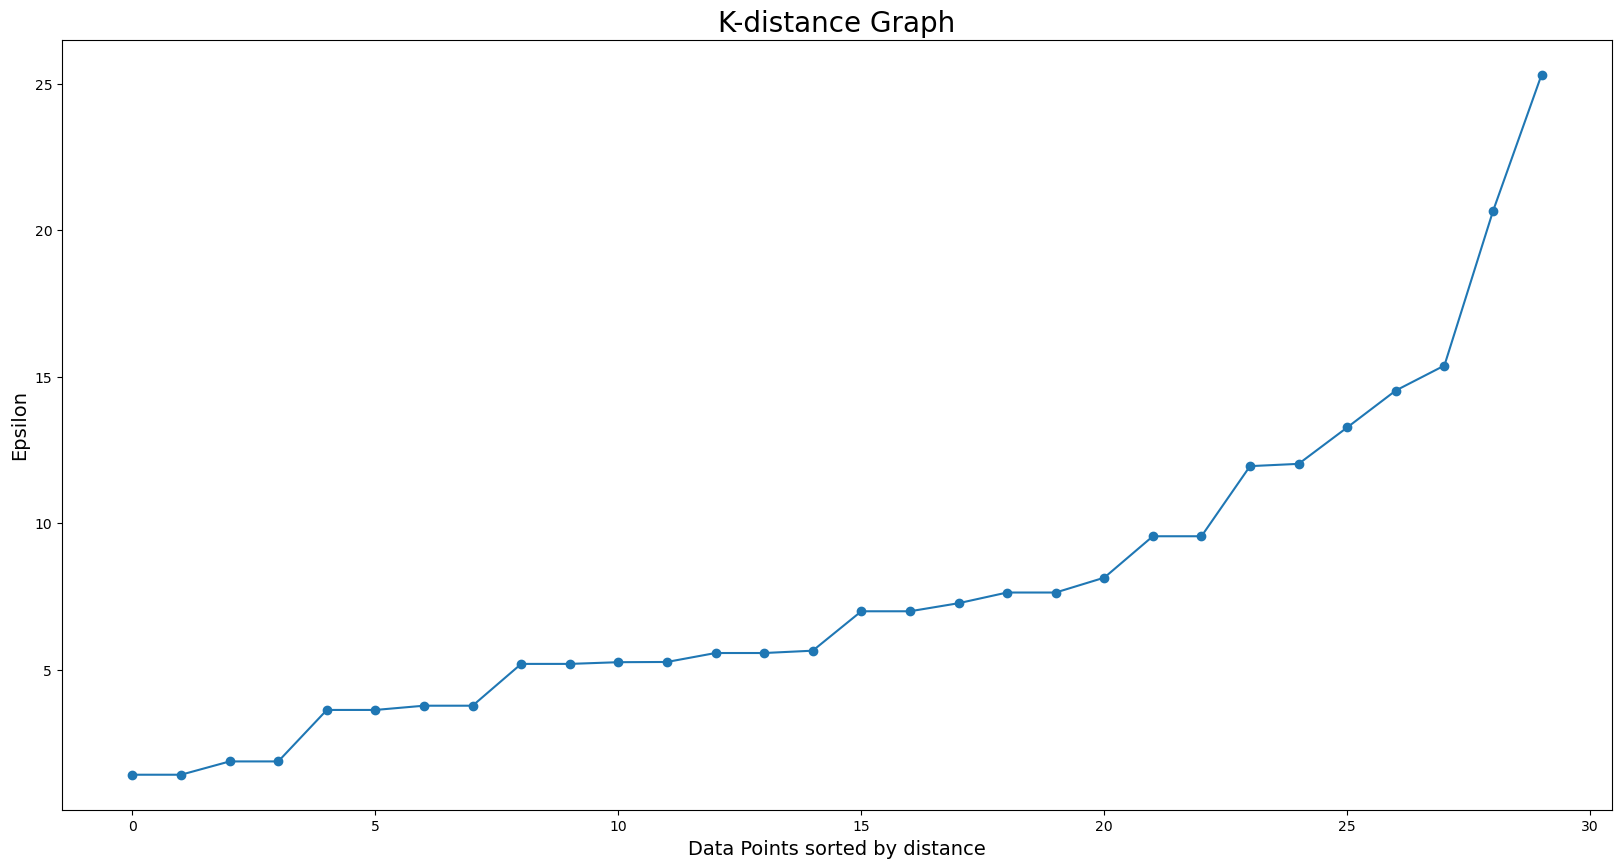

In [36]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances, '-o')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

La línea de código `dbscan_opt = DBSCAN(eps=15, min_samples=4)` crea una instancia de la clase DBSCAN con parámetros específicos. Aquí está una explicación de los parámetros utilizados:

- `eps=15`: Este parámetro establece la distancia máxima entre dos puntos para que uno sea considerado en el vecindario del otro. En este caso, se ha fijado en 15 unidades, lo que significa que dos puntos estarán en el mismo vecindario si su distancia euclidiana es menor o igual a 15.

- `min_samples=4`: Este parámetro establece el número mínimo de puntos que deben estar dentro del vecindario de un punto para que se considere un punto central. En este caso, se ha fijado en 4, lo que significa que un punto se considerará central si hay al menos 4 puntos (incluyendo él mismo) en su vecindario.
Si `min_samples` se establece en un valor alto, DBSCAN encontrará clústeres más densos, mientras que si se establece en un valor bajo, los clústeres encontrados serán más dispersos.

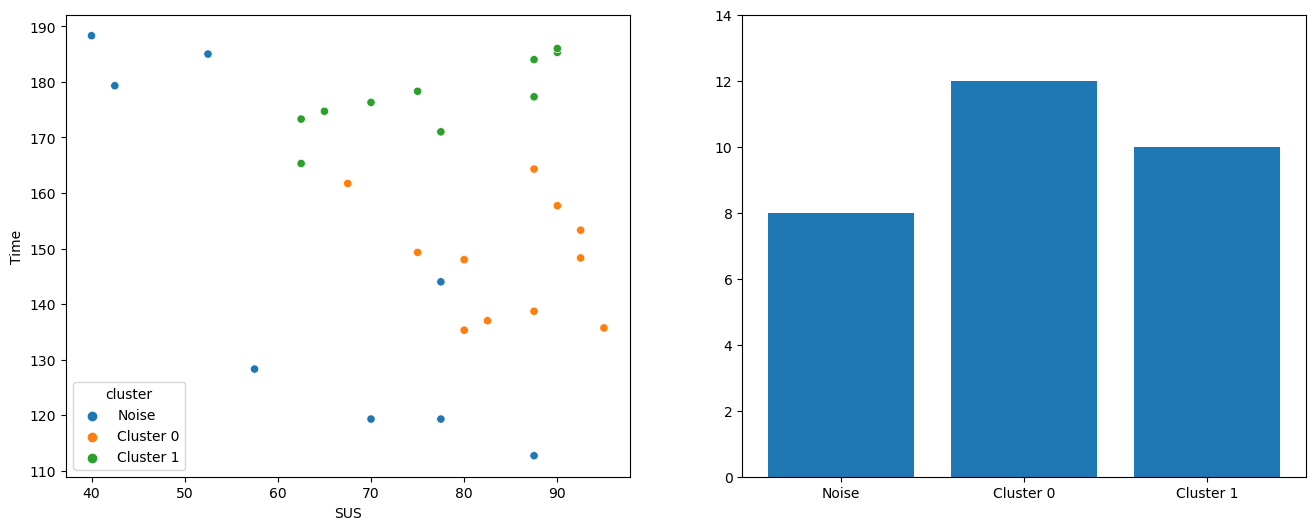

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1, -1])

In [37]:
dbscan_opt = DBSCAN(eps=15, min_samples=4)
dbscan_opt.fit(X)  # model with all data

results = pd.DataFrame({'SUS': X[:, 0], 'Time': X[:, 1], 'cluster': dbscan_opt.labels_})
cluster_mapping = {-1: "Noise", 0: "Cluster 0", 1: "Cluster 1"}
results.cluster = results.cluster.map(cluster_mapping)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(data=results,
                x='SUS',
                y='Time',
                hue='cluster',
                legend=True
                )
plt.subplot(1,2,2)
plt.bar(*np.unique(dbscan_opt.labels_, return_counts=True))
plt.xticks([-1, 0, 1], ['Noise', 'Cluster 0', 'Cluster 1'])
plt.yticks(range(0,15,2))
plt.show()

dbscan_opt.labels_

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Los dos clusters, identificados como 0 y 1 en color naranja y verde respectivamente, muestran consistencia en sus características. El cluster 1 (verde) está compuesto por empleados, todos en sus treinta o cuarenta años de edad. En contraste, el cluster 0 (naranja) está formado por individuos en sus veinte años, mayoritariamente estudiantes, con un tiempo de realización del ejercicio menor en comparación con el cluster 1.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/dbscan_ux.png" alt="" width="600"/>

Al observar las observaciones identificadas como ruido por el algoritmo DBSCAN, marcadas en color azul en el scatterplot, podemos hacer algunas observaciones adicionales:

- La región 1 del scatterplot contiene observaciones de usuarios que han dado una puntuación más baja en la usabilidad del sistema y han tardado más tiempo en completar el ejercicio en comparación con el resto de los participantes (los que peor rendimiento tuvieron en la prueba).
- En la región 2, encontramos una sola observación con resultados de tiempo y usabilidad comparables al cluster 0 (naranja), pero que no pertenece al grupo de edad de veinte años ni es estudiante, como la mayoría de este grupo.
- En la región 3, se identifica un grupo de tres estudiantes (en sus veinte años) y un empleado (en sus treinta años), todos hombres, que han completado el ejercicio en un tiempo menor que el resto del grupo de participantes (los que mejor rendimiento tuvieron en la prueba).

Un análisis más detallado y exhaustivo debe llevarse a cabo para identificar los clusters generados por cada técnica de agrupamiento. Al finalizar el notebook, presentaremos algunos gráficos y análisis adicionales para profundizar en la comprensión de los resultados obtenidos.

In [38]:
X = np.array(encoded_data)  # model with all data
gmm_model.fit(X)
labels = gmm_model.predict(X)

# En el sisguiente dataset vamos a colocar las etiquetas resultantes de los diferentes métodos
data_cl = data.copy()
data_cl['Kmeans'] = kmeans.labels_.astype('str')
data_cl['Kmodes'] = kmodes.labels_.astype('str')
data_cl['gmm_TS'] = labels_TS.astype('str')  # usando solo variables continuas
data_cl['gmm_all'] = labels_all.astype('str')  # usando todas las variables (incluye codificadas)
data_cl['dbscan'] = dbscan_opt.labels_.astype('str')

<a name="jerarquico"></a>
### Clustering jerárquico

El clustering jerárquico se basa en la creación de una jerarquía de agrupamientos en la que los datos se organizan en una estructura de árbol. Sea $X$ el conjunto de datos, el proceso de agrupamiento jerárquico puede ser representado matemáticamente de la siguiente manera:

1. **Agrupamiento Aglomerativo:**
   - Inicialización: Cada punto $x_i \in X$ se considera como un clúster individual $C_i$.
   - Iterativamente, se fusionan los clústeres más cercanos basándose en alguna medida de distancia o disimilitud entre clústeres. Esto se repite hasta que todos los puntos están en un solo clúster o en el número deseado de clústeres.

   $$ C_i = \{x_i\} \quad \text{para todo} \quad x_i \in X $$

   $$ C_i \leftarrow \text{Fusión de } C_i \text{ y } C_j \quad \text{donde} \quad i, j = \arg \min \text{dist}(C_i, C_j) $$

2. **Agrupamiento Divisivo:**
   - Inicialización: Todos los puntos $X$ se consideran como un único clúster $C$.
   - Iterativamente, se dividen los clústeres basándose en alguna medida de distancia o disimilitud entre puntos dentro del clúster. Esto se repite hasta que cada punto está en su propio clúster o en el número deseado de clústeres.

   $$ C = X $$

   $$ C_i, C_j \leftarrow \text{División de } C \text{ en } C_i \text{ y } C_j \quad \text{donde} \quad i, j = \arg \max \text{dist}(x_i, x_j) $$

En ambos casos, la distancia o disimilitud entre puntos o clústeres ($\text{dist}$) juega un papel crucial y puede variar según la medida utilizada, como la distancia euclidiana, la distancia de Manhattan o alguna otra medida definida por el usuario. El resultado final es un dendrograma que representa la jerarquía de agrupamientos.


### Agrupamiento Aglomerativo

**Función linkage:**

En clustering jerárquico, la función de enlace (linkage) se utiliza para calcular la distancia entre clústeres durante el proceso de aglomeración. La distancia determina cómo se fusionan los clústeres y qué tan similares deben ser para considerarse para la fusión. Hay varios métodos de enlace comúnmente utilizados, y aquí se describen algunos de ellos:

Supongamos que tienes dos clústeres $ A $ y $ B $ con puntos $ x $ e $ y $ respectivamente.

1. **Enlace Completo (Complete Linkage):**
   $$ d(A, B) = \max(\text{dist}(x, y)) $$
   La distancia entre dos clústeres es la máxima distancia entre sus puntos más alejados.

2. **Enlace Simple (Single Linkage):**
   $$ d(A, B) = \min(\text{dist}(x, y)) $$
   La distancia entre dos clústeres es la mínima distancia entre sus puntos más cercanos.

3. **Enlace Promedio (Average Linkage):**
   $$ d(A, B) = \frac{1}{n_A \cdot n_B} \sum_{i \in A} \sum_{j \in B} \text{dist}(x_i, y_j) $$
   La distancia entre dos clústeres es el promedio de todas las distancias entre sus puntos.

4. **Enlace de Ward (Ward's Linkage):**
   Utiliza la varianza para decidir qué clústeres fusionar y minimiza la varianza dentro de los clústeres después de la fusión.

Estas son las definiciones matemáticas básicas de algunos métodos de enlace comunes. En estas fórmulas, $ \text{dist}(x, y) $ representa la distancia entre dos puntos $ x $ e $ y $, y $ n_A $ y $ n_B $ son los tamaños de los clústeres $ A $ y $ B $, respectivamente. Estas fórmulas son utilizadas para calcular la distancia entre clústeres durante cada paso del proceso de aglomeración en el clustering jerárquico.

- Representación esquemática de clustering jerárquico aglomerativo:

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/jerarquico_cl.png" alt="" width="800"/>

In [39]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

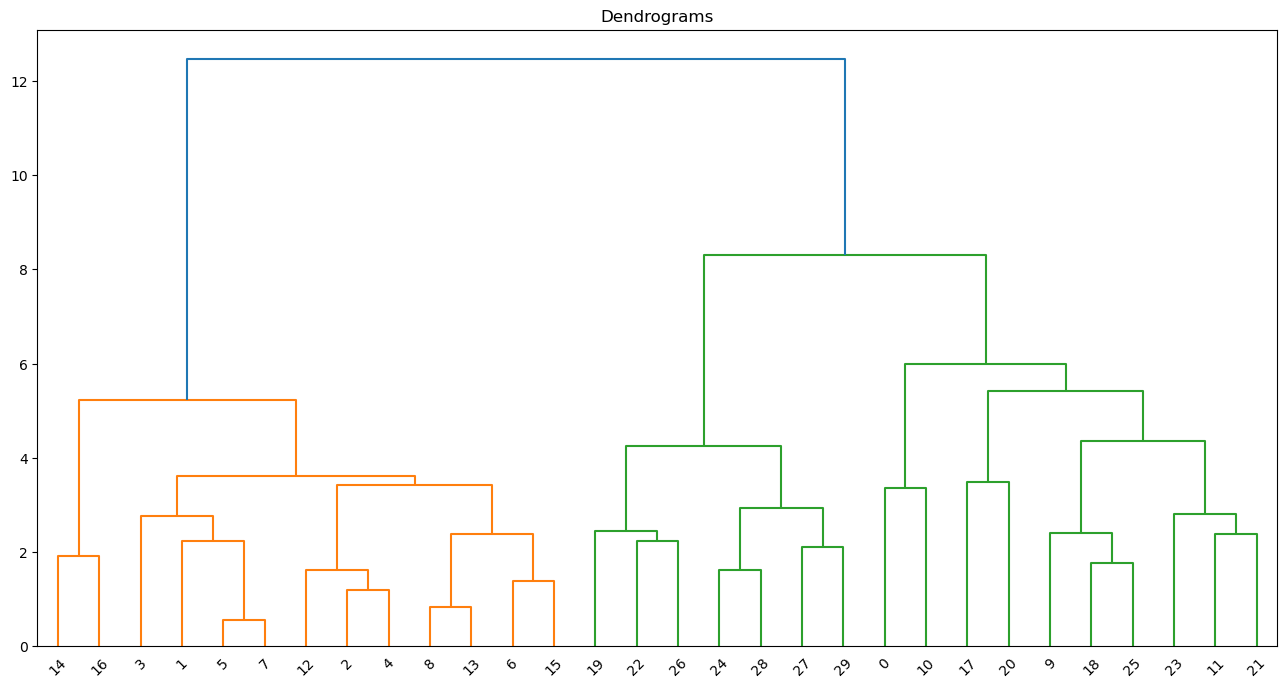

In [40]:
Z = shc.linkage(data_scaled, method='ward')

plt.figure(figsize=(16, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

In [41]:
import ipywidgets

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')

    return ddata

d = [10, 7.5, 5.75, 5.325]

@ipywidgets.interact
def plot(Clusters=[2, 3, 4, 5]):
    cluster = AgglomerativeClustering(n_clusters=Clusters, metric='euclidean', linkage='ward')
    labels = cluster.fit_predict(data_scaled)
    print(np.unique(labels, return_counts=True))

    plt.figure(figsize=(12, 8))
    fancy_dendrogram(
        Z,
        truncate_mode='lastp',
        p=12,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,
        max_d=d[Clusters-2],
    );
    plt.show()

interactive(children=(Dropdown(description='Clusters', options=(2, 3, 4, 5), value=2), Output()), _dom_classes…

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

<a name="resultados"></a>
**Entendamos los grupos (clusters) generados**

Hemos recopilado los grupos generados por cada técnica de agrupamiento en el siguiente dataframe. También se han incluido dos componentes principales. A continuación, llevaremos a cabo un ejercicio de visualización y discusión de los resultados para profundizar en nuestra comprensión de los datos.

In [42]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(data_scaled)
data_cl['agglomerative'] = labels.astype('str')
data_cl["PC1"] = pc_transformation.PC1
data_cl["PC2"] = pc_transformation.PC2

data_cl['Age'] = pd.Categorical(data_cl['Age'],
                                   categories=['twenty', 'thirty', 'forty'],
                                   ordered=True)

data_cl

SUS   Time        ID Gender     Age   Kinect      NUI    Games Kmeans  \
0   42.5  179.3   student      M  twenty     high  average     high      0   
1   92.5  153.3   student      M  twenty     high     high     high      1   
2   95.0  135.7   student      M  twenty  average  average     high      1   
3   92.5  148.3   student      F  twenty  average     high     high      1   
4   80.0  148.0   student      M  twenty  average  average     high      1   
5   87.5  138.7   student      M  twenty  average     high     high      1   
6   75.0  149.3   student      M  twenty  average  average  average      1   
7   80.0  135.3   student      M  twenty  average     high     high      1   
8   80.0  148.0   student      M  twenty  average     high  average      1   
9   65.0  174.7  employee      F   forty  average     high     none      0   
10  40.0  188.3   student      F  twenty  average     high  average      0   
11  67.5  161.7  employee      M  twenty  average  average  average      1   
12  82.5  137.0   student      M  twenty  average     none     high      1   
13  90.0  157.7   student      M  twenty  average     high  average      1   
14  70.0  119.3   student      M  twenty  average     none     none      1   
15  77.5  119.3   student      M  twenty  average  average  average      1   
16  87.5  112.7   student      M  twenty  average     none  average      1   
17  57.5  128.3  employee      M  thirty     high     none  average      0   
18  52.5  185.0  employee      F   forty  average  average  average      0   
19  62.5  173.3  employee      M   forty     none     none     none      1   
20  62.5  165.3  employee      M  thirty     high     high     high      0   
21  87.5  177.3  employee      M   forty  average     none  average      1   
22  75.0  178.3  employee      M  thirty     none  average  average      0   
23  87.5  164.3  employee      F  twenty  average  average  average      1   
24  87.5  184.0  employee      F   forty     none  average     none      1   
25  70.0  176.3  employee      F  thirty  average  average  average      0   
26  90.0  185.3  employee      M  thirty     none     none     none      1   
27  90.0  186.0  employee      F  thirty     none  average  average      1   
28  77.5  171.0  employee      F   forty     none     none     none      1   
29  77.5  144.0  employee      F  thirty     none  average  average      1   

   Kmodes gmm_TS gmm_all dbscan agglomerative       PC1       PC2  
0       1      0       1     -1             0 -1.653543  2.163630  
1       1      1       0      0             1 -2.664201  0.763526  
2       1      1       0      0             1 -2.107784 -0.982539  
3       1      1       0      0             1 -1.464268  0.735110  
4       1      1       0      0             1 -1.807135 -0.259044  
5       1      1       0      0             1 -2.275589  0.058094  
6       1      1       0      0             1 -1.181957 -0.439659  
7       1      1       0      0             1 -2.288185  0.244806  
8       1      1       0      0             1 -1.498798  0.107116  
9       0      0       1      1             0  1.784327  1.573885  
10      1      0       1     -1             0  0.108700  2.840979  
11      0      0       1      0             0  0.051878  0.156967  
12      1      1       0      0             1 -1.745536 -1.280285  
13      1      1       0      0             1 -1.393861 -0.047137  
14      1      1       0     -1             1 -0.826358 -1.930570  
15      1      1       0     -1             1 -1.708885 -1.072518  
16      1      1       0     -1             1 -1.617630 -2.262142  
17      0      1       0     -1             0  0.218366 -0.131128  
18      0      0       1     -1             0  1.727384  1.811554  
19      0      0       1      1             0  2.233956 -1.112944  
20      1      0       0      1             0 -0.282207  2.224701  
21      0      0       1      1             0  0.970696 -0.895407  
22      0      0      

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Comparando las diferentes técnicas de clustering y evaluando su desempeño en las dimensiones transformadas por PCA, podemos destacar que tanto KMeans como el clustering jerárquico, al haber utilizado el mismo conjunto de datos que PCA, están operando en un espacio de características común, lo que facilita la comparación de su separabilidad en este espacio. Por otro lado, dado que KModes no ha utilizado el mismo conjunto de datos que PCA, es importante considerar cualquier diferencia en los resultados obtenidos.

A pesar de estas diferencias en los datos utilizados, podemos observar una separación razonable por los tres métodos para los diferentes grupos, lo que indica que los algoritmos de clustering han logrado identificar patrones distintivos en los datos, incluso en las dimensiones transformadas por PCA.

En general, esta comparación detallada entre diferentes algoritmos de clustering y su desempeño en las dimensiones transformadas por PCA proporcionará una comprensión más completa de la estructura de tus datos y ayudará a identificar el método más adecuado para tu análisis.

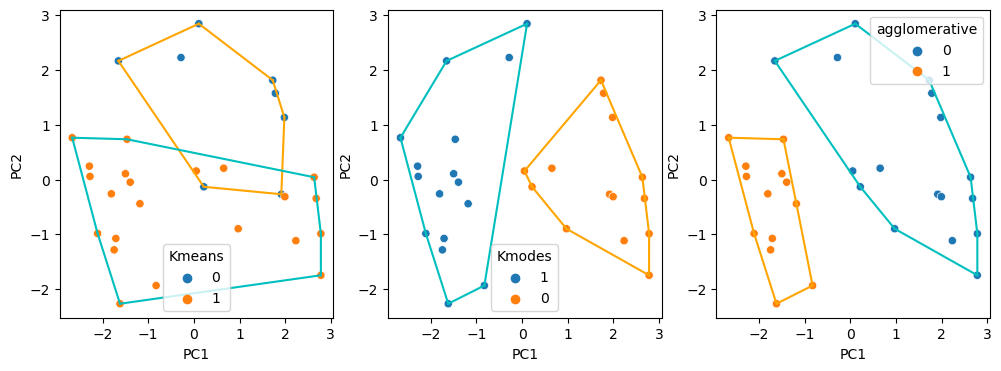

In [43]:
def plot_convex_hull(data_hull, cl_method, colx="PC1", coly="PC2", color=['orange', 'c']):
    # Usa colx, coly para el scatterplot
    #cl_method: nombre de la columna de resultados de clustering, se usa para el hue
    # color, lista de colores, tantos como clusteres
    sns.scatterplot(x=data_hull[colx], y=data_hull[coly], hue=data_hull[cl_method])

    points = np.array(data_hull[[colx, coly]])
    points = points[np.where(data_hull[cl_method] == '0')[0]]
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color[0])

    points = np.array(data_hull[[colx, coly]])
    points = points[np.where(data_hull[cl_method] == '1')[0]]
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color[1])


plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plot_convex_hull(data_cl, 'Kmeans')
plt.subplot(1,3,2)
plot_convex_hull(data_cl, 'Kmodes')
plt.subplot(1,3,3)
plot_convex_hull(data_cl, 'agglomerative', color=['c', 'orange'])
plt.show()

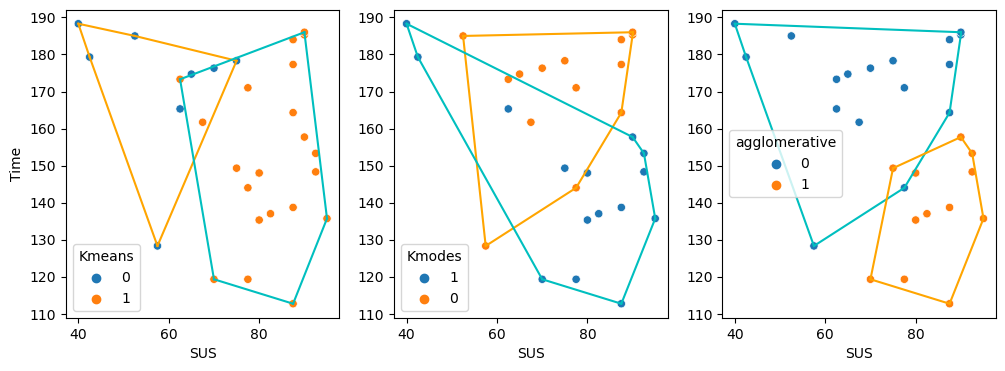

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plot_convex_hull(data_cl, 'Kmeans', colx='SUS', coly='Time')
plt.subplot(1,3,2)
plot_convex_hull(data_cl, 'Kmodes', colx='SUS', coly='Time')
plt.ylabel("")
plt.subplot(1,3,3)
plot_convex_hull(data_cl, 'agglomerative', colx='SUS', coly='Time', color=['c', 'orange'])
plt.ylabel("")
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Más allá de evaluar la separabilidad de los clústeres utilizando PCA, también queremos entender los grupos en las variables originales Time y SUS. En este contexto, el clustering aglomerativo muestra menos solapamientos entre los clusters, lo que resalta la importancia de realizar un análisis a nivel de variables originales.

Es importante tener en cuenta que el análisis de clustering ha sido multivariado, considerando todas las columnas del conjunto de datos. Sin embargo, al tomar un subconjunto de estas variables, específicamente Time y SUS, para visualizar la separabilidad, podemos obtener una perspectiva más detallada sobre cómo se agrupan los datos en función de estas variables clave.

A continuación, se presenta un análisis que se centra en estas variables originales para comprender mejor la estructura de los clústeres y su relación con las dimensiones transformadas por PCA.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



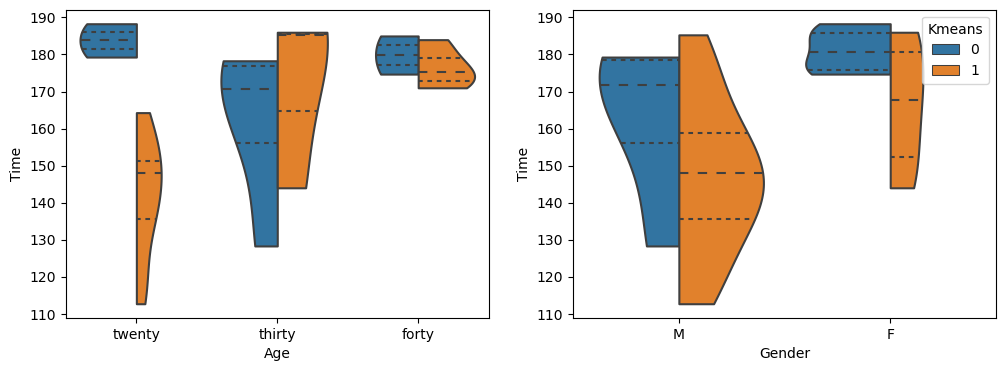

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



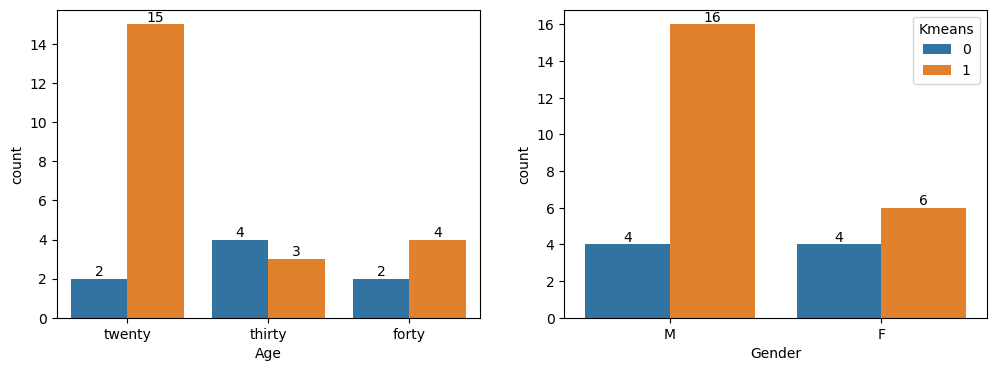

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.violinplot(data=data_cl, x="Age", y="Time", 
               hue="Kmeans", cut=0, 
               split=True, inner="quartil")
plt.legend([],[], frameon=False)
plt.subplot(1,2,2)
sns.violinplot(data=data_cl, x="Gender", y="Time", 
               hue="Kmeans", cut=0, 
               split=True, inner="quartil")
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = sns.countplot(data=data_cl, x="Age", hue="Kmeans")
for container in ax.containers:
    ax.bar_label(container)
plt.legend([],[], frameon=False)
plt.subplot(1,2,2)
ax = sns.countplot(data=data_cl, x="Gender", hue="Kmeans")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>

Para KMeans, podemos observar que los participantes pertenecientes al cluster 1 realizan el ejercicio en un tiempo visiblemente menor que el cluster 0. Esta diferencia es evidente en los diagramas de violín, donde el tercer cuartil (Q3) del cluster 1 está por debajo del primer cuartil (Q1) del cluster 0 en todos los casos. Además, la moda de la distribución (pico del diagrama de densidad) es visiblemente menor para el cluster 1.

Además, el cluster 1 está compuesto exclusivamente por jóvenes (en sus 20s), y es mayoritariamente masculino, con solo una mujer formando parte de este clúster. Esto sugiere que los usuarios que completan el ejercicio en menos tiempo son jóvenes hombres.

- Repita este análisis para otros métodos de clustering, decida qué método separa mejor los grupos a partir de los gráficos descriptivos.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/iconmonstr-error-filled.png" align="left" width="140px"/>
<h3>Observaciones</h3>
<br clear="left"/>


<a name="implicaciones"></a>
### Implicaciones empresariales

Las implicaciones empresariales del Estudio de Usabilidad de un Sistema de Telerehabilitación con Kinect se listan a continuación:

1. Mejora del diseño del sistema: Los hallazgos del estudio pueden proporcionar información valiosa sobre las áreas específicas del sistema que requieren mejoras en términos de usabilidad. Esto permite a la empresa realizar ajustes y optimizaciones en el diseño y la funcionalidad del sistema para satisfacer mejor las necesidades y expectativas de los usuarios.

2. Incremento de la satisfacción del cliente: Al abordar los problemas de usabilidad identificados en el estudio, la empresa puede mejorar la experiencia del usuario y aumentar la satisfacción general de los clientes. Un sistema más fácil de usar y más intuitivo puede generar una mayor lealtad de los usuarios y fomentar recomendaciones positivas, lo que puede impulsar el crecimiento del negocio.

3. Diferenciación competitiva: La atención a la usabilidad y la experiencia del usuario puede diferenciar el sistema de telerehabilitación de la competencia. Al ofrecer una experiencia de usuario superior, la empresa puede destacarse en el mercado y posicionarse como líder en la industria, lo que puede ser un factor clave para atraer nuevos clientes y retener a los existentes.

4. Optimización de recursos: Identificar los grupos de usuarios con necesidades y preferencias similares a través del clustering puede permitir a la empresa personalizar la oferta de servicios y recursos para satisfacer mejor las demandas específicas de cada segmento de usuarios. Esto puede ayudar a optimizar la asignación de recursos y maximizar el retorno de la inversión en el desarrollo y mantenimiento del sistema de telerehabilitación.

<a name="conclusiones"></a>
### Conclusiones

1. Se han explorado y comparado varias técnicas de clustering, incluyendo KMeans, KModes, GMM, DBSCAN y clustering jerárquico, para analizar un conjunto de datos de usabilidad de un sistema de telerehabilitación.
2. Se observó que diferentes técnicas de clustering pueden producir resultados diferentes, lo que resalta la importancia de explorar múltiples enfoques y evaluar su idoneidad para los datos y el problema específico.
3. El análisis de los resultados reveló patrones interesantes en los datos de usabilidad, como la separabilidad de los grupos y la influencia de las variables numéricas y categóricas en la formación de clusters.
4. Se identificaron grupos de usuarios con características similares, lo que puede ser útil para personalizar la experiencia del usuario y mejorar la usabilidad del sistema de telerehabilitación.

### Recomendaciones

1. Se recomienda realizar un análisis más detallado de los grupos identificados en cada técnica de clustering para comprender mejor las características de los usuarios en cada cluster.
2. Sería beneficioso explorar técnicas de preprocesamiento adicionales, como otras técnicas de escalado de variables numéricas y técnicas de codificación de variables categóricas (one-hot encoding), para mejorar la calidad de los resultados de clustering.
3. Se sugiere realizar análisis de sensibilidad para evaluar la robustez de los resultados de clustering frente a cambios en los parámetros de los algoritmos, como el número de clusters.
4. Para futuras investigaciones, se recomienda recopilar datos adicionales o utilizar técnicas de adquisición de datos más avanzadas para capturar una mayor variedad de información sobre la usabilidad del sistema de telerehabilitación. Esto podría incluir datos de interacción del usuario en tiempo real o retroalimentación cualitativa sobre la experiencia del usuario.

<a name="anexo"></a>
### ANEXO: Variables importantes (Feature importance)

- ¿Qué variables son importantes?

Una vez asignadas las etiquetas usando una técnica de clustering podemos
realizar un análsis de características importantes para entender cómo fueron modelados nuestros clusters. Ahora nuestro problema es supervisado, donde la variable a modelar es la etiqueta dada por el cluster.

**Importancia de características**

La "importancia de características" (feature importance) se refiere a una medida que evalúa la contribución de cada característica o variable en un modelo de aprendizaje automático para hacer predicciones. Esta medida ayuda a comprender cuánto impacto tiene cada característica en la capacidad del modelo para realizar predicciones precisas.

Existen varias formas de calcular la importancia de características, y la elección de la técnica puede depender del tipo de modelo utilizado. Algunas de las formas comunes de medir la importancia de características incluyen:

1. **Importancia basada en árboles:**
   - En modelos de árboles de decisión y ensambles de árboles (como Random Forest o Gradient Boosting), la importancia de características se puede calcular según la cantidad de veces que una característica se utiliza para dividir los nodos en los árboles y la mejora resultante en la pureza o precisión del modelo.

2. **Importancia basada en coeficientes:**
   - En modelos lineales, como la regresión lineal o la regresión logística, la importancia de características se puede determinar según los coeficientes asignados a cada característica. Características con coeficientes más grandes tienen una mayor influencia en las predicciones del modelo.

3. **Importancia basada en permutaciones:**
   - Esta técnica implica permutar aleatoriamente los valores de una característica y medir el impacto resultante en el rendimiento del modelo. La disminución en el rendimiento después de la permutación indica la importancia de esa característica.

La importancia de características es valiosa para la interpretación del modelo y la toma de decisiones. Puede ayudar a identificar las variables más influyentes, destacar posibles problemas de multicolinealidad o sobreajuste, y simplificar el modelo al seleccionar las características más relevantes.

**PCA**

Aunque PCA no está diseñado específicamente para resaltar "variables importantes", puede proporcionar información valiosa sobre la estructura y las relaciones dentro de un conjunto de datos.

PCA proporciona una representación compacta y no correlacionada de los datos, lo que puede ayudar a entender las estructuras subyacentes y resaltar las variables que más contribuyen a la varianza en el conjunto de datos.

Vea el notebook: https://nbviewer.org/github/marsgr6/EN-online/blob/main/dimensionality_reduction.ipynb

**Un biplot** en el contexto de Análisis de Componentes Principales (PCA) es una representación gráfica que combina la información de las proyecciones de los puntos de datos y las direcciones de las variables originales en el espacio de los componentes principales. Aquí hay una guía básica sobre cómo interpretar un biplot en PCA:

1. **Puntos de Datos:**
   - Cada punto en el biplot representa una observación o un caso en el conjunto de datos original. La posición de un punto en el biplot está determinada por sus coordenadas en el espacio de los componentes principales.

2. **Direcciones de las Variables Originales:**
   - Las flechas en el biplot representan las direcciones de las variables originales en el espacio de los componentes principales. **La longitud y la dirección de cada flecha indican la contribución y la dirección de máxima variabilidad de cada variable en los componentes principales.**

  - Variables con flechas largas: Contribuyen significativamente a la variabilidad en los datos y son consideradas como importantes en términos de su impacto en los componentes principales.

  - Variables con flechas cortas: Tienen una contribución menor a la variabilidad y pueden considerarse como menos importantes en el contexto de PCA.

  - Esta interpretación es valiosa al seleccionar las características más relevantes o al intentar comprender qué variables están impulsando la estructura de los datos en el espacio de componentes principales.

3. **Proximidad entre Puntos y Flechas:**
   - La proximidad de un punto a una flecha indica la relación entre la observación y la variable correspondiente. Si un punto está cerca de una flecha, significa que esa observación tiene un alto valor en esa variable. Si un punto y una flecha tienen una orientación similar, sugiere que hay una relación positiva entre la variable y la observación.

4. **Correlación entre Variables:**
   - La correlación entre dos variables puede ser inferida por el ángulo entre las flechas correspondientes en el biplot. Un ángulo pequeño sugiere una correlación positiva, mientras que un ángulo cercano a 180 grados sugiere una correlación negativa.

5. **Concentración de Varianza:**
   - La concentración de puntos en ciertas direcciones del biplot indica la cantidad de varianza capturada por esos componentes principales. Las direcciones con más puntos indican las direcciones de mayor variabilidad en los datos.

6. **Identificación de Grupos:**
   - Si hay grupos o patrones en los datos, es posible que los puntos de esos grupos estén cerca unos de otros y tengan orientaciones similares en relación con las flechas de las variables.

El biplot en PCA proporciona una representación visual intuitiva de las relaciones entre las observaciones y las variables en el espacio de los componentes principales. Es una herramienta valiosa para interpretar la estructura de los datos y para identificar patrones, correlaciones y contribuciones relativas de las variables a la variabilidad en los datos.

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


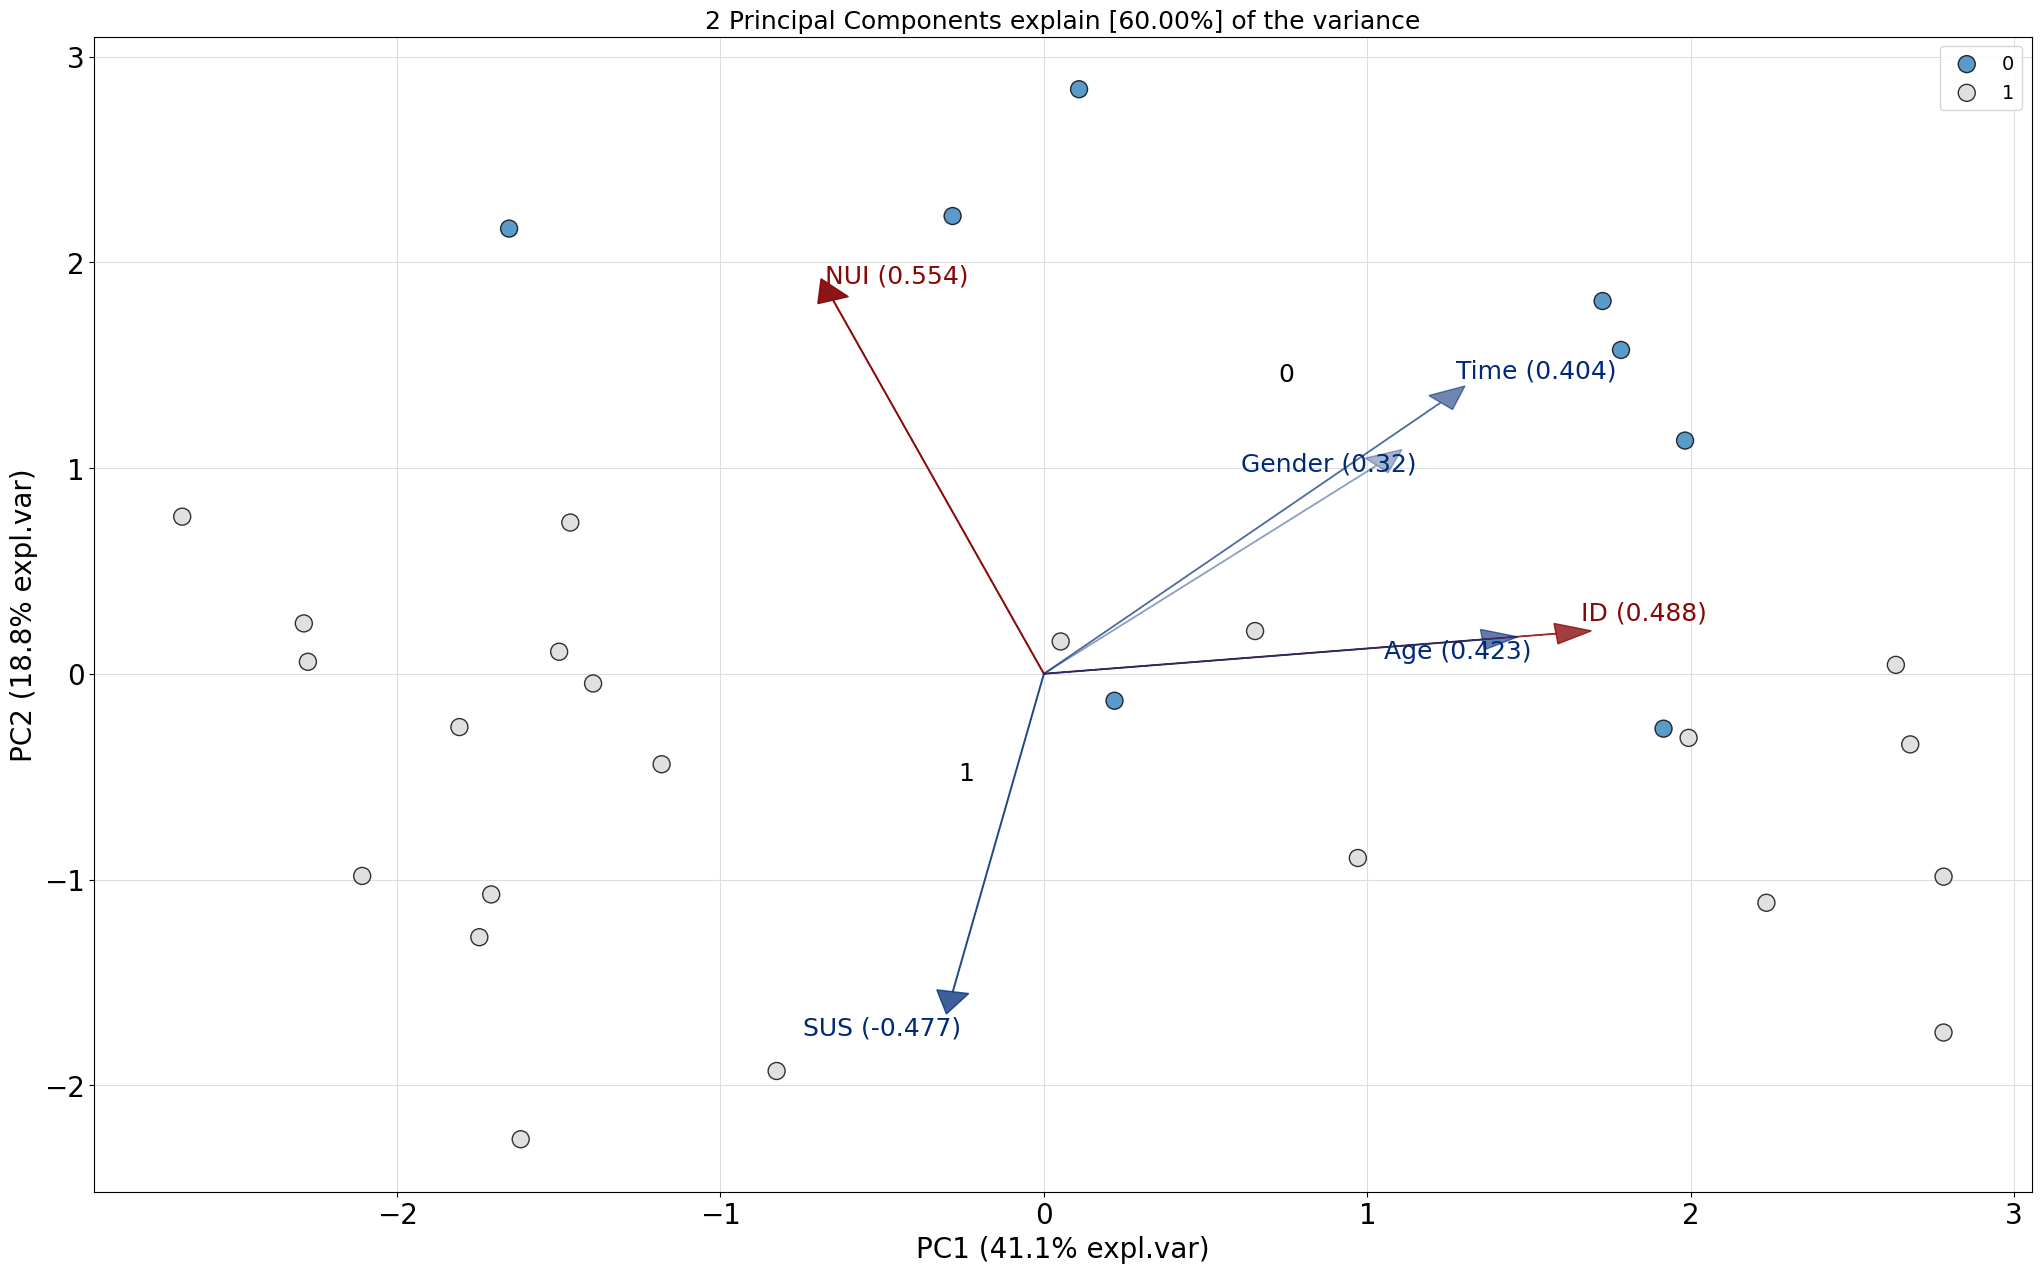

In [46]:
from pca import pca

model = pca(n_components=2)

# Fit and transform
results = model.fit_transform(X=pd.DataFrame(data_scaled, columns=data.columns), row_labels=data_cl.Kmeans)

# Plot the explained variance
#fig, ax = model.plot()
#plt.show()
# Scatter the first two PCs
#fig, ax = model.scatter()
#plt.show()

# Create a biplot
fig, ax = model.biplot(n_feat=6)
plt.show()

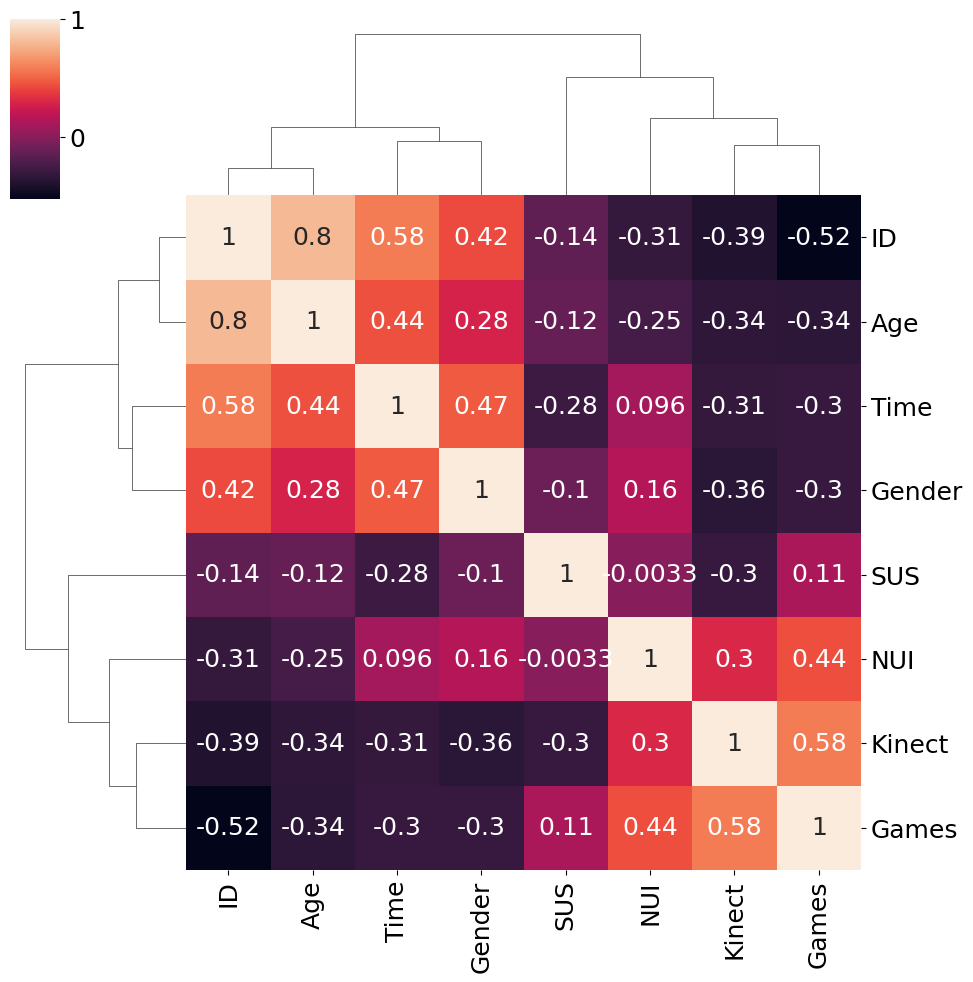

In [47]:
sns.clustermap(encoded_data.corr(), annot=True)
plt.show()

### Random Forest para obtener la Importancia de Características

Random Forest (Bosque Aleatorio) es un algoritmo de aprendizaje automático que pertenece a la categoría de ensambles, específicamente, a los ensambles de árboles de decisión. La idea central detrás de Random Forest es construir múltiples árboles de decisión durante el entrenamiento y combinar sus predicciones para obtener un resultado más robusto y preciso.

Aquí hay una descripción básica de cómo funciona Random Forest:

1. **Construcción de Múltiples Árboles:**
   - Se crean varios árboles de decisión durante el entrenamiento, cada uno basado en una muestra aleatoria del conjunto de datos (bootstrap) y utilizando un subconjunto aleatorio de las características para dividir los nodos.

2. **Votación por Mayoría o Promedio:**
   - Para realizar predicciones, cada árbol en el bosque emite su propia predicción. En el caso de clasificación, se realiza una votación por mayoría para determinar la clase final, y en el caso de regresión, se realiza un promedio de las predicciones de los árboles.

3. **Bootstrap y Muestreo de Características:**
   - El uso de bootstrap (muestreo con reemplazo) y la selección aleatoria de características ayuda a introducir variabilidad en cada árbol, lo que mejora la generalización y la robustez del modelo.

4. **Reducción de la Correlación entre Árboles:**
   - Dado que cada árbol se construye en una muestra diferente y utiliza un conjunto diferente de características para tomar decisiones, los árboles en el bosque son menos propensos a estar altamente correlacionados entre sí.

5. **Manejo de Datos No Balanceados:**
   - Random Forest tiende a manejar bien conjuntos de datos no balanceados y es menos propenso al sobreajuste en comparación con un solo árbol de decisión.

6. **Importancia de Características:**
   - Random Forest proporciona una medida de la importancia de cada característica en el proceso de toma de decisiones, lo que puede ser útil para la interpretación del modelo.

Random Forest se utiliza comúnmente en tareas de clasificación y regresión y ha demostrado ser efectivo en una variedad de dominios. Su capacidad para manejar conjuntos de datos grandes y complejos, así como su resistencia al sobreajuste, lo convierten en una opción popular en la práctica del aprendizaje automático.

In [48]:
from sklearn.ensemble import RandomForestClassifier

X = encoded_data[encoded_data.columns]
y = kmeans.labels_  # Usaremos las etiquetas dadas por Kmeans

rf = RandomForestClassifier(n_estimators=100, random_state=123)
# cambiar valores de acuerdo al numero de columnas en el dataset
rf.fit(X, y)

RandomForestClassifier(random_state=123)

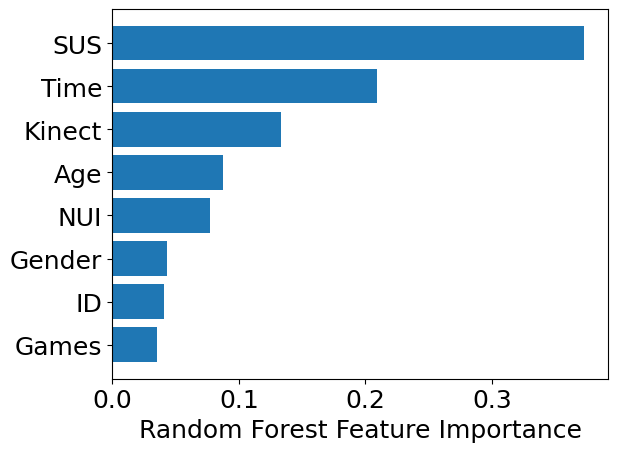

In [49]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][:], rf.feature_importances_[sorted_idx][:])
plt.xlabel("Random Forest Feature Importance")
plt.show()

### Sources and resources

- https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
https://jakevdp.github.io/PythonDataScienceHandbook/index.html
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html